<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;a:link{color: white}">
    <h1 style='color:GhostWhite;'>Should This Loan be Approved or Denied ?</h1>

An XGBoost data model to predict whether a loan can be approved or denied.<br>
    
Any comments are welcome.<br><br>
The Notebook is divided into 3 Parts:<br>
<ul>
<li><a style="color:Azure;" href="#part1"><b>Part 1 :</b> Pipeline</a> - this is the end result encapsulated into a pipeline</li><br>
<li><a style="color:Azure;" href="#part2"><b>Part 2 :</b> Data Exploration (EDA) and Preparation, Modeling, Metrics</a> - from start to end, with some notes to make sense of it</li><br>
<li><a style="color:Azure;" href="#part3"><b>Part 3 :</b> XGBoost HyperParameter Tuning using Optuna</a>
</ul><br>
"Our model results are way more dependent on how well feature engineering is performed than on the model itself. Machine Learning models are like very skilled linguists that can decipher any text in any language. However, it will not be helpful if they are handed a bunch of scribbles or blurred out text. EDA should not be skipped, as a thorough EDA and feature engineering process accounts for 90% of the results of a good model."<br><br>
    A good method of avoiding memory leaks is doing processing inside a function. <b>It creates a new scope for the intermediate variables and removes them automatically</b> when the interpreter exits the function; hence, most of the code below are encapsulated inside functions.  
</div>

<div class="alert alert-block alert-success">  
    <b>Dataset Source</b><br><br>
    <a href="https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied">U.S. Small Business Administration (SBA) Dataset</a>
<br><br>
    All information about the dataset can be found at the <b>above link</b><br><br>    
    *<i>Thanks to Hamza for his <a href="https://www.kaggle.com/code/hamzaghanmi/xgboost-hyperparameter-tuning-using-optuna/notebook">Notebook on Optuna</a> which was used as a guide.</i> 
<br><br>
    If interested, Data Exploratory Visualization in Tableau can also be seen at :<br>
    <a href= "https://public.tableau.com/app/profile/joseph8038/viz/SBADatasetVisualizationandAnalysis/SBADatasetVisualizationandAnalysis-StoryBoard">SBA Data Exploratory Visualization in Tableau</a>
</div>

<h2>Table Of Contents</h2>
<ul>
    <li><a style="color:DarkSlateGrey" href="#paths_and_flags">Paths and Flags</a></li>
    <li><a style="color:DarkSlateGrey" href="#libraries">Libraries</a></li>   
    <li><a style="color:DarkSlateGrey" href="#functions">Custom Functions And Classes</a></li>
    <li><a style="color:DarkSlateGrey" href="#metrics">Metrics Function</a></li>
    <li><a style="color:DarkSlateGrey" href="#xgboost_class">XGBoost Class</a></li>
    <li><a style="color:DarkSlateGrey" href="#optuna_class">Optuna Class</a></li><br>
    <li><a style="color:DarkSlateGrey" href="#part1">Part 1. PipeLine</a></li>
    <ul>
        <li><a style="color:DarkSlateGrey" href="#pl_classes">Pipeline Classes</a></li>
        <li><a style="color:DarkSlateGrey" href="#load_pl_df">Load Dataset for PipeLine</a></li>
        <li><a style="color:DarkSlateGrey" href="#pl_run">Run the pipeline</a></li>
    </ul>
    <br>
    <li><a style="color:DarkSlateGrey" href="#part2">Part 2. Data Exploration and Preparation, Modeling, Metrics</a></li>
    <ul>
        <li><a style="color:DarkSlateGrey" href="#de_load_df">Load Dataset</a></li>
        <li><a style="color:DarkSlateGrey" href="#dep">Data Exploration / Preparation</a></li>
        <li><a style="color:DarkSlateGrey" href="#build_model">Build Model Using XGBoost</a></li>
        <ul>
            <li><a style="color:DarkSlateGrey" href="#model1">Model v1</a></li>
            <li><a style="color:DarkSlateGrey" href="#oversample">Oversample</a></li>
            <ul>
                <li><a style="color:DarkSlateGrey" href="#model2">Model v2</a></li>
                <li><a style="color:DarkSlateGrey" href="#model3">Model v3</a></li>
            </ul>
        </ul>
        <li><a style="color:DarkSlateGrey" href="#test_model">Test Model</a></li>
        <ul>
            <li><a style="color:DarkSlateGrey" href="#test_test_dataset">Test Model With Test Dataset</a></li>
           <li><a style="color:DarkSlateGrey" href="#test_user_input">Test Model With User Input</a></li>
        </ul>
        <li><a style="color:DarkSlateGrey" href="#mutual_info">Mutual Information Scores</a></li>
        <li><a style="color:DarkSlateGrey" href="#trim_datasets">Trim Datasets</a></li>
        <li><a style="color:DarkSlateGrey" href="#results1">Full or Trimmed Dataset</a></li>
    </ul>  
    <br>
    <li><a style="color:DarkSlateGrey" href="#part3">Part 3. XGBoost HyperParameter Tuning using Optuna</a></li>
    <ul>
    <li><a style="color:DarkSlateGrey" href="#find_best_hp">Find The Best HyperParameter Combination</a></li>
    <li><a style="color:DarkSlateGrey" href="#try_best_hp">Model v4 : Try the Optuna Hyperparameters</a></li>
    <li><a style="color:DarkSlateGrey" href="#optuna_results">Optuna Tuning Results</a></li>
    </ul>
</ul>

<a id="paths_and_flags"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Paths and Flags</b></div>

In [161]:
'''
Change this kaggle_flag to :
   0 - if running outside Kaggle (e.g. Jupyter Notebook), change filepath & savepath to your 
       own path
   1 - if running as a Kaggle notebook
'''
kaggle_flag = 0

# alert_flag - change to 0 for no sound alert, 1 for sound alert after long running cells
alert_flag = 1

# switch to 1 if using GPU
gpu_flag = 0

#---------------------------------------------------------------------------------------#

if kaggle_flag == 1:
    filepath = "../input/should-this-loan-be-approved-or-denied/"  # Kaggle
    savepath = "./"   #Kaggle
    ''' 
    final_ds is a file that was uploaded into this Kaggle notebook's input path.  It is the 
    cleaned dataset after performing Part 2 of this notebook.  It was first saved to the savepath
    in Part 2, then downloaded manually, and re-uploaded into the input Kaggle storage. This file 
    will serve as input in Part 3.
    '''
    final_ds = '../input/sba-final-csv-feather/sba_final.csv.feather' 
else:
    filepath = "C:\\Python\\Python_Data_Science_Exercises\\datasets\\"
    savepath = "C:\\Python\\Python_Data_Science_Exercises\\datasets\\"
    final_ds = "C:\\Python\\Python_Data_Science_Exercises\\datasets\\sba_final.csv.feather"

audio_path="https://www.soundjay.com/misc/sounds/tablet-bottle-1.mp3" # for alert

if gpu_flag == 0:
    tree_method = 'hist'
else:
    tree_method = 'gpu_hist'

<a id="libraries"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Libraries</b></div>

In [162]:
piplist = !pip list

# for text-to-speech
if not piplist.grep('pyttsx3'):
    !pip3 install pyttsx3
    
# for oversampling
if not piplist.grep('imbalanced-learn'):
    !pip3 install imbalanced-learn

if not piplist.grep('xgboost'):
    !pip3 install xgboost
    
if not piplist.grep('optuna'):
    !pip3 install optuna

# for saving file in feather format
if not piplist.grep('pyarrow'):
    !pip3 install pyarrow

# for EDA 
if not piplist.grep('pandas-profiling'):
    !pip3 install pandas-profiling
    
if not piplist.grep('sweetviz'):
    !pip3 install sweetviz
    
if not piplist.grep('dataprep'):
    !pip3 install dataprep

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pyttsx3
from IPython.display import Audio, display
from IPython.display import FileLink
from IPython.display import IFrame
from IPython.core.display import HTML
import hashlib
import copy      # for deepcopy()
import datetime as dt
import optuna
import gc
from pandas_profiling import ProfileReport
import sweetviz as sv
%matplotlib inline  

In [164]:
''' 
Set up voice object.  Used in different areas of notebook to indicate completion of long processes.
'''
if kaggle_flag == 0:   # not Kaggle
    engine = pyttsx3.init()  # object creation

    """ RATE"""
    rate = engine.getProperty('rate')   # getting details of current speaking rate
    #print (rate)                        #printing current voice rate
    engine.setProperty('rate', 175)     # setting up new voice rate

    """VOLUME"""
    volume = engine.getProperty('volume')   #getting to know current volume level (min=0 and max=1)
    #print (volume)                         #printing current volume level
    engine.setProperty('volume',0.7)        # setting up volume level  between 0 and 1

    """VOICE"""
    voices = engine.getProperty('voices')       #getting details of current voice
    #engine.setProperty('voice', voices[0].id)  #changing index, changes voices. o for male
    engine.setProperty('voice', voices[1].id)   #changing index, changes voices. 1 for female

<a id="functions"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Custom Functions and Classes</b></div>

In [200]:
class color:
    purple = '\033[95m'
    cyan = '\033[96m'
    darkcyan = '\033[36m'
    blue = '\033[94m'
    green = '\033[92m'
    yellow = '\033[93m'
    red = '\033[91m'
    bold = '\033[1m'
    underline = '\033[4m'
    end = '\033[0m'
    bdunl = '%s%s' % (bold, underline)
    bdblue = '%s%s' % (bold, blue)
    bdgreen = '%s%s' % (bold, green)
    bdred = '%s%s' % (bold, red)

In [166]:
# copy from corochann (Kaggle Grandmaster) notebook 
# https://www.kaggle.com/code/corochann/ashrae-feather-format-for-fast-loading/notebook

from pandas.api.types import is_datetime64_any_dtype as is_datetime

def reduce_mem_usage(df, use_float16=False):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        if is_datetime(df[col]):
            # skip datetime type
            continue
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and \
                            c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print()
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [167]:
def check_cols_with_nulls(df):
    cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
    if len(cols_with_missing) == 0:
        print("No Missing Values")
    else:
        print(cols_with_missing)
    
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [168]:
def check_infinity_nan(df,dfname):
    print("checking for infinity")
  
    #ds = sba.isin([np.inf, -np.inf])
    #print(ds)
  
    # printing the count of infinity values
    print()
    print("printing the count of infinity values")
  
    count = np.isinf(df).values.sum()
    print(f"{dfname} contains " + str(count) + " infinite values")
    print()
    
    has_nan = df.isnull().values.any()
    print(f"Does {dfname} have Nan or Null values ?  {has_nan}")

In [169]:
# used as a converter when loading csv
def fixvals(val):
    retval = val.replace('$','').replace(',','')
    return retval

In [170]:
## I could also use the jupyter notebook magic cell %%time
def runtime(rt1,rt2):
    tdiff=rt2 - rt1
    # get seconds and convert to h:m:s
    print()
    print(f'Runtime : {str(dt.timedelta(seconds=tdiff.total_seconds()))}')

In [171]:
def create_download_link(title = "Download ", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title + filename,filename=filename)
    return HTML(html)

<a id="metrics"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Metrics Function</b></div>

In [172]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def model_eval(y_valid,predictions, cmDisplay='False'):
    print('MAE:', metrics.mean_absolute_error(y_valid, predictions))
    #print('MSE:', metrics.mean_squared_error(y_valid, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))
    print()
    
    ClassificationReport = classification_report(y_valid,predictions.round(),output_dict=True)

    print(f'{color.bold}Classification Report:{color.end}')
    print(classification_report(y_valid,predictions.round()))
    
    print()
    print(f'{color.bold}Confusion Matrix:{color.end}')

    if cmDisplay == True:
        cm = confusion_matrix(y_valid, predictions)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        fig, ax = plt.subplots(dpi=100,figsize=(5,5))
        disp.plot(ax=ax,colorbar=False,values_format='d')
    
    cmv = confusion_matrix(y_valid, predictions)
    
    TrueNeg = cmv[0][0]
    FalsePos = cmv[0][1]
    FalseNeg = cmv[1][0]
    TruePos = cmv[1][1]

    TotalNeg = TrueNeg + FalseNeg
    TotalPos = TruePos + FalsePos
    
    print()
    print(f'True Negative : CHGOFF (0) was predicted {TrueNeg} times correctly \
  ({round((TrueNeg/TotalNeg)*100,2)} %)')
    print(f'False Negative : CHGOFF (0) was predicted {FalseNeg} times incorrectly \
    ({round((FalseNeg/TotalNeg)*100,2)} %)')
    print(f'True Positive : P I F (1) was predicted {TruePos} times correctly \
    ({round((TruePos/TotalPos)*100,2)} %)')
    print(f'False Positive : P I F (1) was predicted {FalsePos} times incorrectly \
    ({round((FalsePos/TotalPos)*100,2)} %)')
    
    print()
    asm = (accuracy_score(y_valid, predictions.round()) * 100)
    print(f'{color.bdgreen}Accuracy for model: %.2f{color.end}' % asm)
    print(f'{color.bdblue}f1-score:{color.end}')
    print(f"   CHGOFF (0) : {round(ClassificationReport['0']['f1-score']*100,2)}")
    print(f"   P I F (1)  : {round(ClassificationReport['1']['f1-score']*100,2)}")
    
    return {'cmv':cmv, 'ClassificationReport':ClassificationReport, 'AccuracyScore':asm}

**Feature Importance**

In [173]:
from xgboost import plot_importance

# Plot feature importance
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize,dpi=600)
    return plot_importance(booster=booster, ax=ax)

**Mutual Information**

In [174]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    print()
    print("Please wait, Mutual Information gathering can take time ...")
    X = X.copy()
    #for colname in X.select_dtypes(["object", "category"]):
    #    X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    #discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    #mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = mutual_info_regression(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    print("Mutual Information gathering done ...")
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

<a id="xgboost_class"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>XGBoost Class</b></div>

In [175]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split
#from xgboost import XGBRegressor
from xgboost import XGBClassifier

class process_model():  
    def __init__(self, X, y):
        self.X = X
        self.y = y

        print(f'MIS_Status Count ->  1 : {Counter(y)[1]}, 0 : {Counter(y)[0]}')
    
    # oversampling method
    def osample(self):
        # define oversampling strategy
        oversample = RandomOverSampler(sampling_strategy='minority') 
        print(len(self.X))
        print(len(self.y))
        # fit and apply the transform
        X_over, y_over = oversample.fit_resample(self.X, self.y)

        # summarize class distribution
        print(f'Before Oversampling -> 1 : {Counter(self.y)[1]}, 0 : {Counter(self.y)[0]}')
        print(f'After Oversampling  -> 1 : {Counter(y_over)[1]}, 0 : {Counter(y_over)[0]}')
        
        # update X and y with the oversampled results 
        self.X = X_over
        self.y = y_over
        
        # return the oversampled results in case they are needed in another module
        return {'X_over':X_over, 'y_over':y_over}
    
    # Method to run model 
    # X_size - size of X - e.g. 0.8
    # desc - description of metrics report
    def prep_run_model(self, X_size, desc='Metrics', cmDisplay=False, PipeLine_flag = False,\
                hyperparams = {'n_estimators': 1000, 'learning_rate': 0.05, 'max_depth': 6, \
                               'tree_method':tree_method}):
    
        self.X_size = X_size
       
        # Split Data into Train:Validate:Test
        
        # train_size=X_size

        # In the first step, we will split the data in training and remaining dataset
        X_train, X_rem, y_train, y_rem = train_test_split(self.X, self.y, train_size=self.X_size,\
                                                        random_state=101) 

        # Now since we want the valid and test size to be equal. 
        # we have to define valid_size=0.5 (that is 50% of remaining data)
        # test_size = 0.5

        X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem,test_size=0.5,\
                                                            random_state=101)
    
        print()
        print(f'{color.bdunl}Shapes Before And After Splitting Dataset:{color.end}')
        print('X',self.X.shape,end=''), print('   y', self.y.shape)
        print('X_train',X_train.shape,end=''), print('   y_train', y_train.shape)
        print('X_valid',X_valid.shape,end=''), print('   y_valid', y_valid.shape)
        print('X_test', X_test.shape, end=''), print('   y_test', y_test.shape)
    
        print()
        print(f'{color.bold}Please wait, Fitting model can take time ...{color.end}')
        
        '''
        XGBRegressor is for continuous target/outcome variables. These are often called 
        "regression problems."

        XGBClassifier is for categorical target/outcome variables. These are often called 
        "classification problems."
        
        xg_model = XGBRegressor(n_estimators = self.mn_estimators, \
                                learning_rate = self.mlearning_rate, \
                                max_depth = self.mmax_depth,\
                                n_jobs=4)
        
        xg_model = XGBClassifier(n_estimators = self.mn_estimators, \
                                learning_rate = self.mlearning_rate, \
                                max_depth = self.mmax_depth,\
                                use_label_encoder =False,\
                                n_jobs=4)
        '''
        
        if PipeLine_flag == True:
            # hyperparams is a result of Optuna hyperparameter tuning (Part 3 of this notebook)
            hyperparams = {'lambda': 1.7027989534144277, 'alpha': 0.002513482315987308, 
                     'colsample_bytree': 0.7, 'subsample': 0.6, 'n_estimators': 4000, 
                     'learning_rate': 0.018, 'max_depth': 17, 'random_state': 48, 
                     'min_child_weight': 21, 'tree_method':tree_method}
        
        xg_model = XGBClassifier(**hyperparams,use_label_encoder =False, n_jobs=4)
       
        xg_model.fit(X_train, y_train, 
                     early_stopping_rounds=5,
                     eval_metric=['logloss'],
                     eval_set=[(X_valid, y_valid)], 
                     verbose=False)
 
        print("Fitting model completed.")
        print()
        print("Preparing Evaluation Metrics")
    
        # Get predictions
        predictions = xg_model.predict(X_valid)
    
    
        print()
        print(f'{color.underline}{desc}{color.end}')

        eval_results = model_eval(y_valid, predictions, cmDisplay)
           
        # Return these values as they will be needed for further testing or metrics
        # in dictionary form to remember easier 
        return {'xg_model':xg_model,'predictions':predictions, \
                    'X_train':X_train, 'y_train':y_train, \
                    'X_valid':X_valid, 'y_valid':y_valid, \
                    'X_test':X_test, 'y_test':y_test, 'eval_results':eval_results}

<a id="optuna_class"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Optuna Class</b></div>

In [199]:
class optuna_tuning():  
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def objective(self, trial):
        # In the first step, we will split the data in training and remaining dataset
        X_train, X_rem, y_train, y_rem = train_test_split(self.X, self.y, train_size=0.7,\
                                                        random_state=101) 

        # Now since we want the valid and test size to be equal. 
        # we have to define valid_size=0.5 (that is 50% of remaining data)
        # test_size = 0.5

        X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem,test_size=0.5,\
                                                            random_state=101)
        param = {
            # tree_method would ideally be gpu_hist for faster speed
            'tree_method':tree_method, 
            # L2 regularization weight, Increasing this value will make model more conservative
            'lambda': trial.suggest_loguniform('lambda', 1e-3, 2.0),
            # L1 regularization weight, Increasing this value will make model more conservative
            'alpha': trial.suggest_loguniform('alpha', 1e-3, 2.0),
            # sampling according to each tree
            'colsample_bytree': trial.suggest_categorical('colsample_bytree', \
                            [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
            # sampling ratio for training data
            'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
            'learning_rate': trial.suggest_categorical('learning_rate', \
                            [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02,0.05]),
            'n_estimators': 4000,
            # maximum depth of the tree, signifies complexity of the tree
            'max_depth': trial.suggest_categorical('max_depth', [6,7,9,11,13,15,17,20]),
            'random_state': trial.suggest_categorical('random_state', [48]),
            # minimum child weight, larger the term more conservative the tree
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 300)
        }

        model = XGBClassifier(**param,use_label_encoder =False)  
    
        model.fit(X_train,y_train,eval_set=[(X_valid,y_valid)],early_stopping_rounds=100,\
                  verbose=False,eval_metric=['logloss'])
    
        preds = model.predict(X_valid)
    
        rmse = metrics.mean_squared_error(y_valid, preds,squared=False)
    
        return rmse

    def run_optuna_trials(self,n_trials=None,timeout=None):
        #rt1=dt.datetime.now()
        
        print()
        print(f'{color.bold}Please wait, finding best trial ...{color.end}')
        
        study = optuna.create_study(direction='minimize')
        study.optimize(self.objective, n_trials,timeout)

        #rt2=dt.datetime.now()
        #runtime(rt1,rt2)
        print('Number of completed trials:', len(study.trials))
        print('Best trial:', study.best_trial.params)
        
        return study

<a id="part1"></a>
<div style="font-family: Trebuchet MS;background-color:DarkRed;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h1 id="part1" style='color:GhostWhite;'>Part 1. Pipeline</h1>
This pipeline handles both X and y
</div>

<a id="pl_classes"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>PipeLine Classes</b></div>

In [177]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
  
class PL_Object():
    def __init__(self,X,y):
        #store X and Y
        self.X=X
        self.y=y

class PreProcessor(BaseEstimator, TransformerMixin):
    def __init__(self,operation= 'X'):
        self.operation=operation
    @staticmethod
    def enabled(**kwargs):
        return True

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # check the parameters and return X and y inside the object
        X_data=X.X
        y_data=X.y
        
        print()
        print(f'{color.bdunl}PreProcessor initiated for {self.operation}.{color.end}')
        
        #  do some work and assign it back to the X object which contains both X and y data
        if self.operation=='X':
            '''
            # NOTE: 'MIS_Status' is the target (y), but still in X, as we need to drop rows
                    with NaNs. We cannot do it separately, as there will be a mismatch in count 
                    of rows.  At the end of this procedure, we separate the new target data from X 
                    and update y.
            '''
            
            # 1. Drop Na from rows
            #---------------------
            print('1. Drop NaNs')
            X_data.dropna(subset=['DisbursementDate', 'NewExist', 'City', 'State',\
                        'LowDoc', 'Name', 'NAICS', 'CreateJob', 'RetainedJob', 'FranchiseCode',\
                        'UrbanRural', 'NoEmp', 'Term', 'MIS_Status'], how='any', inplace=True)
            
            # drop invalid classifications
            print('   Drop invalid classifications')
            X_data = X_data[(X_data['LowDoc'] == 'Y') | (X_data['LowDoc'] == 'N')]
            
            X_data = X_data[(X_data['NewExist'] == 1) | (X_data['NewExist'] == 2)]   
            
            # Trim leading and trailing spaces
            #---------------------------------
            print('   Trim leading and trailing spaces, if any')
            X_data['City'] = X_data['City'].str.strip()
            
            # 2. Change dtype for columns needed for calculation or string extraction 
            #------------------------------------------------------------------------
            print('2. Change dtype for columns needed for calculation or string extraction')
            X_data = X_data.astype({'DisbursementGross':np.float64,'SBA_Appv':np.float64,\
                              'GrAppv':np.float64, 'ChgOffPrinGr':np.float64, 'NAICS':np.str_})
            
            # 3. Drop Duplicate Rows
            #------------------------------------------------------------------------
            print('3. Drop Duplicate Rows')
            X_data.drop_duplicates(inplace=True)
            
            # 4. Create New Features
            #-----------------------
            print('4. Create New Features')
            X_data['Industry'] = X_data['NAICS'].str[0:2]
            X_data = X_data.astype({'Industry':np.int8})
            
            X_data['Recession'] = np.where((X_data['DisbursementDate'] >= '2007-09-01')\
                     & (X_data['DisbursementDate'] <= '2009-06-30'), 1, 0)
            
            X_data['RealEstate'] = np.where(X_data['Term'] >= 240, 1, 0)
            
            X_data['SBA_Portion']=(X_data['SBA_Appv']/X_data['GrAppv']) * 100
            
            X_data["CityState"] = X_data["City"] + "_" + X_data["State"]
            
            print()
            print(f"X length = {len(X_data)}")
            print(f"Y length = {len(X_data['MIS_Status'])}")
            
            # Update X object
            X.X = X_data                      # type DataFrame
            X.y = X_data.pop('MIS_Status')    # type series
            
        elif self.operation=='y':
            pass                      
        else:
            pass
        
        #return modified X object
        return X
    

class EncodeCategorical(BaseEstimator, TransformerMixin):
    def __init__(self,operation= 'X'):
        self.operation=operation
    @staticmethod
    def enabled(**kwargs):
        return True

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # encode categorical features and return X and y inside the object
        X_data=X.X
        y_data=X.y
        
        print()
        print(f'{color.bdunl}Encode Categorical Features initiated for {self.operation}{color.end}')
        
        #  do some work and assign it back to the X object
        if self.operation=='X':         
            X_data['LowDoc'] = np.where((X_data['LowDoc'] == 'Y'), 1, 0)
            
            len_data=len(X_data)
            #cols_to_drop = []
            hash_constant = 900000   # fixed value so we can programmatically reproduce the hash
            #for col in X_data.columns:
            for col in X_data[['State','CityState']]:
                if X_data[col].dtype == 'object':
                    print(f'Column {col} has {X_data[col].nunique()} values among {len_data}')

                    if X_data[col].nunique() < 25:
                        print(f'One-hot encoding of {col}')
                        one_hot_cols = pd.get_dummies(X_data[col])
                        for ohc in one_hot_cols.columns:
                            X_data[col + '_' + ohc] = one_hot_cols[ohc]
                    else:
                      print(f'Hashing of {col}')
                      X_data[col + '_hash'] = X_data[col].apply(lambda row: int(hashlib.sha1((col +\
                                "_" + str(row)).encode('utf-8')).hexdigest(), 16) % hash_constant)

            X.X = X_data
            
        elif self.operation=='y':
            y_data = np.where(y_data == 'P I F', 1, 0)
            
            y_data = y_data.astype(np.int8)
            
            # convert back to series
            y_data = pd.Series(y_data)

            X.y = y_data                      
        else:
            pass
        #return modified X
        return X    

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self,operation= 'X'):
        self.operation=operation
    @staticmethod
    def enabled(**kwargs):
        return True

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_data=X.X
        
        print()
        print(f'{color.bdunl}Drop Columns initiated for {self.operation}{color.end}')
        
        #  do some work and assign it back to the X object
 
        # Dropping 'City' as 'CityState_hash' is more ideal
        # Zip code has invalid values like 1, 2.  If we pad 0000 to 1, it's still not correct,
        # as state should be Alaska. Zip code 1 is different states in the dataset
        cols_to_drop = ['LoanNr_ChkDgt', 'Zip', 'Bank', 'BankState', 'ApprovalDate', \
                        'ApprovalFY', 'ChgOffDate', 'BalanceGross', 'NAICS', 'ChgOffPrinGr', \
                        'Name', 'RevLineCr', 'DisbursementDate', 'City', 'State', 'CityState',\
                        'GrAppv']

        X_data.drop(columns=cols_to_drop, inplace=True)
            
        print()
        print('Unneeded Columns Dropped')
        
        # reduce mem usage of X_data as final step
        X_data = reduce_mem_usage(X_data)
        
        print()
        print(X_data.info())

        X.X = X_data
            
        #return modified X
        return X    

class XGBoost(BaseEstimator, TransformerMixin):
    def __init__(self,operation= 'X'):
        self.operation=operation
    @staticmethod
    def enabled(**kwargs):
        return True

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_data=X.X
        y_data=X.y
        
        print()
        print(f'{color.bdunl}XGBoost initiated{color.end}')
        #print(len(X_data))
        #print(len(y_data))
        
        # Get predictions using training and validation data
        xg_model_run = process_model(X_data, y_data)
        xg_model_run.osample()
        xg_model_run_results = xg_model_run.prep_run_model(0.7, "Train/Valid Data Metrics",\
                                                          cmDisplay=True, PipeLine_flag = True)   
        
        #Test with unseen data
        print()
        print(f'{color.bdunl}Test With Unseen Data X_test and y_test{color.end}')
        
        xg_model = xg_model_run_results['xg_model']
        x_test = xg_model_run_results['X_test']
        y_test = xg_model_run_results['y_test']
        
        # Get predictions
        predictions = xg_model.predict(x_test)
        cmv = model_eval(y_test, predictions)

        X.X = X_data
            
        '''
        A dictionary is returned, and its values can be used outside the pipeline if needed
        
        {'xg_model':xg_model,'predictions':predictions, \
                    'X_train':X_train, 'y_train':y_train, \
                    'X_valid':X_valid, 'y_valid':y_valid, \
                    'X_test':X_test, 'y_test':y_test, 'cmv':cmv}
        '''
        return xg_model_run_results

<a id="load_pl_df"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Load Dataset for PipeLine</b></div>

In [178]:
X = pd.read_csv(filepath + 'SBAnational.csv',\
                 converters = {'DisbursementGross':fixvals,'SBA_Appv':fixvals,\
                              'GrAppv':fixvals, 'ChgOffPrinGr':fixvals}, \
                              parse_dates=['DisbursementDate'], low_memory=False)
print("Shape of original SBA dataset : ", X.shape)
print()
print(X[['DisbursementGross','SBA_Appv','GrAppv','ChgOffPrinGr','DisbursementDate']].head(2))

# Filter data to before 2011
X = X[X['DisbursementDate'] <= '2010-12-31']

print()
print(f"Size of data after 2010-12-31 : \
    {len(X[X['DisbursementDate'] > '2010-12-31'])}")
print()
print(f"Size of data before 2011 : \
    {len(X[X['DisbursementDate'] < '2011-01-01'])}")

'''
X still contains the target 'MIS_Status', as we have to drop rows 
with NaNs in the pipeline. "MIS_Status" will be separated from X later in the pipeline

Select target - y is initialized as it goes into the pipeline, but will be updated in the pipeline 
after preprocessing.  Others preprocess y outside the pipeline; here, y will be preprocessed in
the pipeline.
'''
y = X['MIS_Status']

Shape of original SBA dataset :  (899164, 27)

  DisbursementGross   SBA_Appv     GrAppv ChgOffPrinGr DisbursementDate
0         60000.00   48000.00   60000.00         0.00        1999-02-28
1         40000.00   32000.00   40000.00         0.00        1997-05-31

Size of data after 2010-12-31 :     0

Size of data before 2011 :     876993


In [179]:
#Assign X and y to the object
My_Object=PL_Object(X,y)
My_Object.X.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,1999-02-28,60000.00,$0.00,P I F,0.00,60000.00,48000.00
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,1997-05-31,40000.00,$0.00,P I F,0.00,40000.00,32000.00


<a id="pl_run"></a>
<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Run the pipeline</b></div>


PreProcessor initiated for X.
1. Drop NaNs
   Drop invalid classifications
   Trim leading and trailing spaces, if any
2. Change dtype for columns needed for calculation or string extraction
3. Drop Duplicate Rows
4. Create New Features

X length = 868663
Y length = 868663

Encode Categorical Features initiated for X
Column State has 51 values among 868663
Hashing of State
Column CityState has 43153 values among 868663
Hashing of CityState

Encode Categorical Features initiated for y

Drop Columns initiated for X

Unneeded Columns Dropped
Memory usage of dataframe is 96.93 MB

Memory usage after optimization is: 40.59 MB
Decreased by 58.1%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868663 entries, 0 to 899163
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               868663 non-null  int16  
 1   NoEmp              868663 non-null  int16  
 2   NewExist           868663 non-null  fl

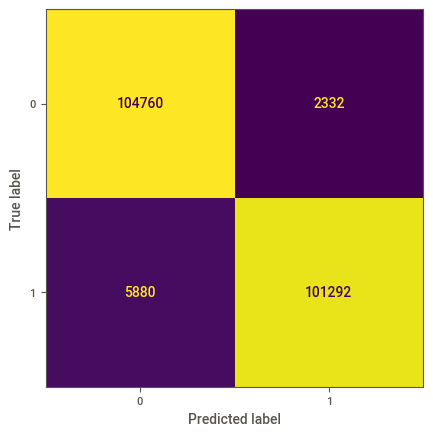

In [180]:
%%time

def RunPipeLine():
    rt1=dt.datetime.now()
    #Assign X and y to the object
    My_Object=PL_Object(X,y)

    #Build a simple pipeline

    My_Pipeline=Pipeline([('X Prep',PreProcessor('X')),
                          ('X EnCat',EncodeCategorical('X')),
                          ('y EnCat',EncodeCategorical('y')),
                          ('DropCols',DropColumns()),
                          ('XGBoost',XGBoost())
                         ])

    My_Object=My_Pipeline.transform(My_Object)

    print()
    print(f'{color.bdred}These results were obtained using the XGBoost parameters tuned by Optuna\
        {color.end}')
    
    print()
    print(f'{color.bold}Pipeline Process Completed.{color.end}')

    rt2=dt.datetime.now()
    runtime(rt1,rt2)
    print()
    
    return My_Object        # for further usage below
    
MyObject = RunPipeLine()

<div class="alert alert-block alert-info" style="color:DarkSlateBlue">
    <b>Just for informative reasons</b>, below shows how we can use data (dictionary) passed back by the pipeline to MyObject
    </div>      

dict_keys(['xg_model', 'predictions', 'X_train', 'y_train', 'X_valid', 'y_valid', 'X_test', 'y_test', 'eval_results'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999896 entries, 620872 to 1225567
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               999896 non-null  int16  
 1   NoEmp              999896 non-null  int16  
 2   NewExist           999896 non-null  float32
 3   CreateJob          999896 non-null  int16  
 4   RetainedJob        999896 non-null  int16  
 5   FranchiseCode      999896 non-null  int32  
 6   UrbanRural         999896 non-null  int8   
 7   LowDoc             999896 non-null  int8   
 8   DisbursementGross  999896 non-null  float32
 9   SBA_Appv           999896 non-null  float32
 10  Industry           999896 non-null  int8   
 11  Recession          999896 non-null  int8   
 12  RealEstate         999896 non-null  int8   
 13  SBA_Portion        9998

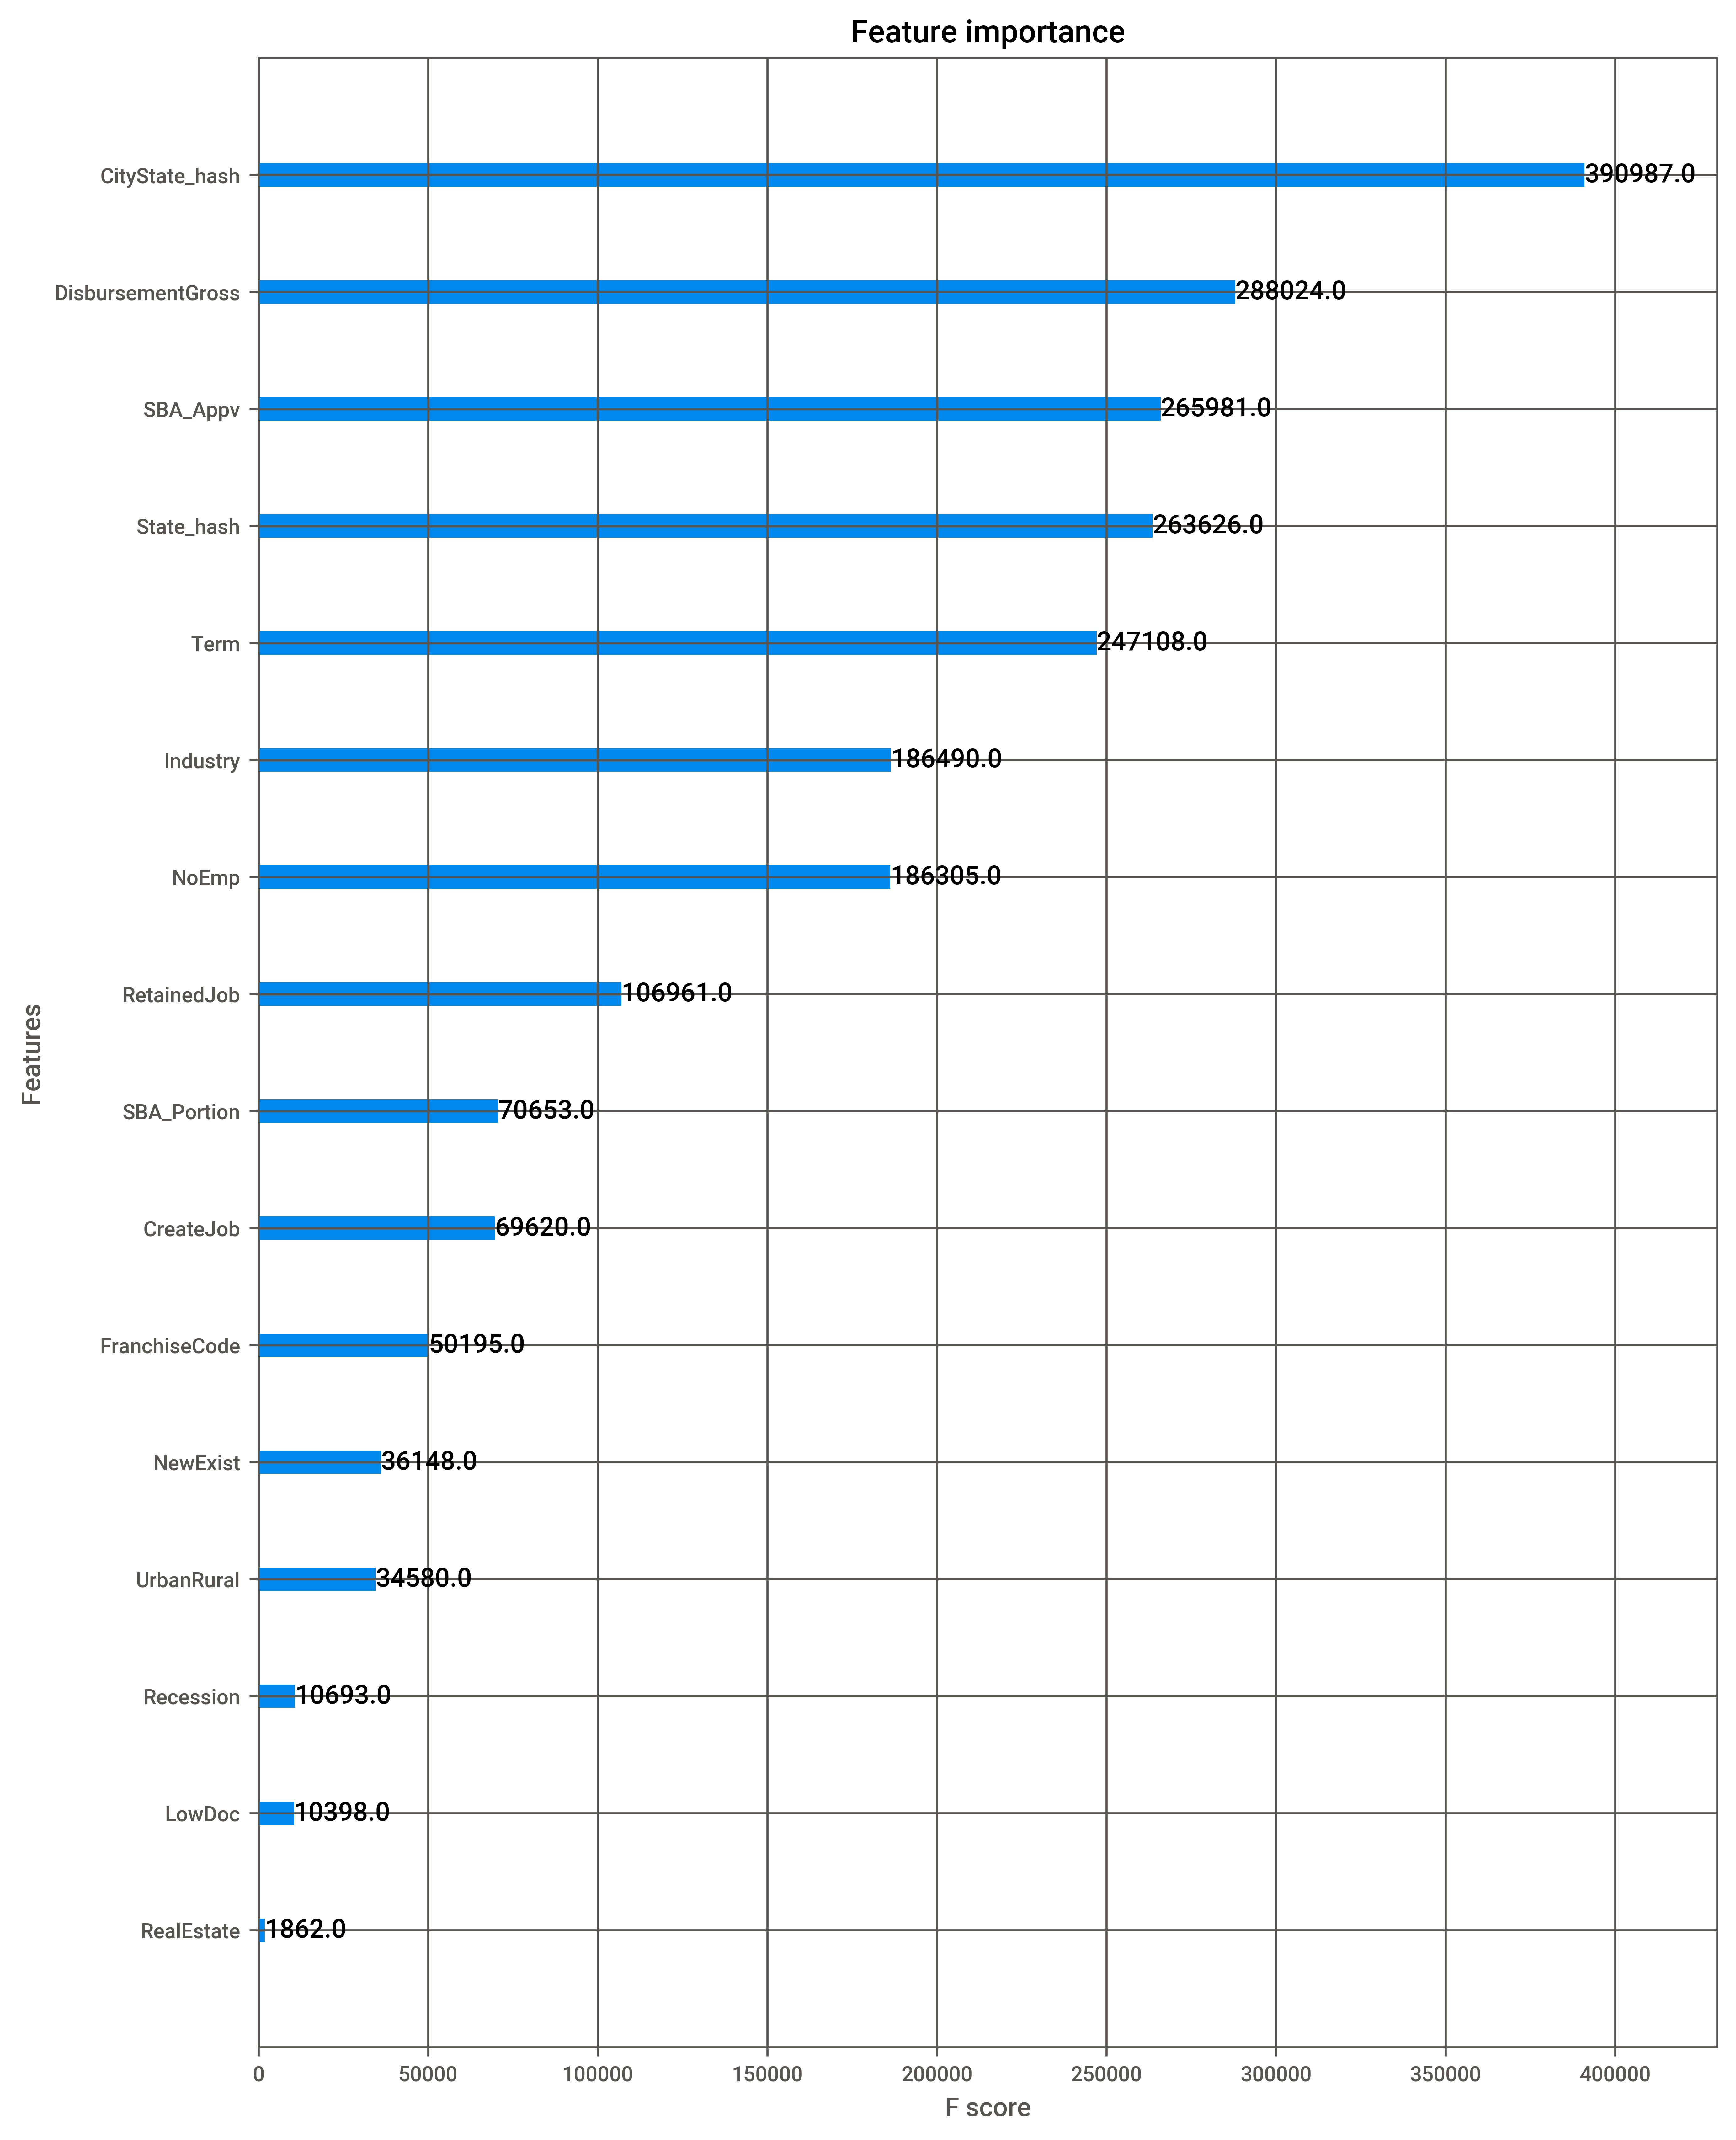

In [181]:
def obj_sample_usage():
    print(MyObject.keys())
    pl_model = MyObject['xg_model']
    x=plot_features(pl_model, (10,14))
    print()
    MyObject['X_train'].info()
    
obj_sample_usage()

In [182]:
# clear some variables from memory
del X, y, MyObject
gc.collect()

9723

In [183]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("SBA Machine Learning PipeLine completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<a id="part2"></a>
<div style="font-family: Trebuchet MS;background-color:DarkRed;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h1 style='color:GhostWhite;'>Part 2 : Data Exploration and Preparation, Modeling, Metrics</h1></div>

<a id="de_load_df"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h3 style='color:GhostWhite;'>1. Load Dataset</h3></div>

In [59]:
sba = pd.read_csv(filepath + 'SBAnational.csv',low_memory=False)
sba.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"


<a id="dep"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2. Data Exploration / Preparation</h2><br>
    </div>

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Prepare Pandas Profiler Report for a more detailed exploration</b><br>
    </div>

In [82]:
'''
For a better experience, the report is created as an html file that can be opened in a browser,
and downloaded from there  (Save As ..., html)
'''

def GetPandasProfiling():
    print(f'{color.bdblue}Please wait ... Profiling Report may take some time.{color.end}')

    # uncomment if one wants to see the report in a cell below
    #sba.profile_report(title='SBA Pandas Profiling Report')

    profile = sba.profile_report(title='SBA Pandas Profiling Report', progress_bar=False)
    profile.to_file(output_file = savepath + "SBA_Profiling_Report.html")
    print(f'{color.bdblue}Profiling Report completed.{color.end}')
        
GetPandasProfiling()

print()

(kaggle_flag == 0) and print(f'SBA Profiling Report has been downloaded to path {savepath}')
    
(kaggle_flag == 1) and create_download_link('Open SBA Profiling Report in browser ---> ', \
                         savepath + 'SBA_Profiling_Report.html')

Please wait ... Profiling Report may take some time.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Reload dataset with some conversion</b><br>
    After review, decided to reload dataset with conversion of some features that may be needed for calculation.  It could be done after loading, but this is for instructive purposes on how it's done.
    </div>

In [32]:
sba = pd.read_csv(filepath + 'SBAnational.csv',\
                 converters = {'DisbursementGross':fixvals,'SBA_Appv':fixvals,\
                              'GrAppv':fixvals, 'ChgOffPrinGr':fixvals},\
                              parse_dates=['DisbursementDate'], \
                              low_memory=False)
print("Shape of SBA : ", sba.shape)
sba[['DisbursementGross','SBA_Appv','GrAppv','ChgOffPrinGr','DisbursementDate']].head(2)

Shape of SBA :  (899164, 27)


,DisbursementGross,SBA_Appv,GrAppv,ChgOffPrinGr,DisbursementDate
0,60000.00,48000.00,60000.00,0.00,1999-02-28
1,40000.00,32000.00,40000.00,0.00,1997-05-31


<a id="conv_dtype"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.1 Convert dtype</h2>
    </div>

In [1391]:
# Convert dtype of some columns that will be used in calculation or string extraction
sba = sba.astype({'DisbursementGross':np.float64,'SBA_Appv':np.float64,\
                              'GrAppv':np.float64, 'ChgOffPrinGr':np.float64, 'NAICS':np.str_})

<a id="drop_rows_cols"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.2 Drop rows or columns if needed</h2>
    </div>

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Check for na's in all columns, as well as invalid categories</b></div>

['Name', 'City', 'State', 'Bank', 'BankState', 'NewExist', 'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate', 'MIS_Status']


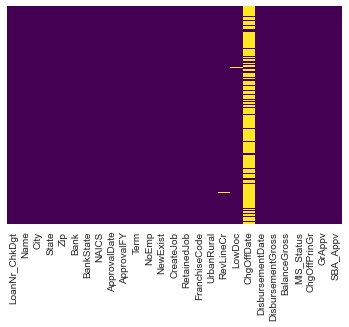

In [1392]:
check_cols_with_nulls(sba)

In [1393]:
print(f'{color.bdunl}Features with NA values{color.end}')
sba.isna().sum()

Features with NA values


LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

**The number of Na's in rows for the following features, with respect to the size of the database, are not many and can be dropped.**

In [1394]:
sba.dropna(subset=['DisbursementDate', 'NewExist', 'City', 'State',\
                        'LowDoc', 'Name', 'NAICS', 'CreateJob', 'RetainedJob', 'FranchiseCode',\
                        'UrbanRural', 'NoEmp', 'Term', 'MIS_Status'], how='any', inplace=True)      

In [1395]:
sba.isna().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                   1502
BankState              1509
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4518
LowDoc                    0
ChgOffDate           731189
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>RevLineCr</b></div>

In [1396]:
len(sba[(sba['RevLineCr'] != 'Y') & (sba['RevLineCr'] != 'N')])
# too many unknowns, we will drop 'RevlineCr' later

277071

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>LowDoc</b></div>

In [1397]:
len(sba[(sba['LowDoc'] != 'Y') & (sba['LowDoc'] != 'N')])

3411

<AxesSubplot:xlabel='LowDoc', ylabel='count'>

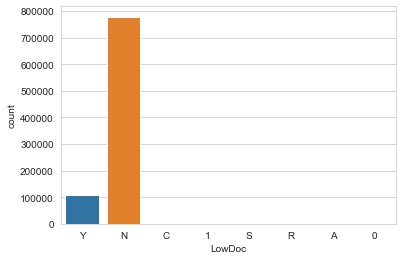

In [1398]:
sns.countplot(x='LowDoc',data=sba)

* **LowDoc seems to have a bearing**

In [1399]:
# we can drop rows that are not 'Y' or 'N'
sba = sba[(sba['LowDoc'] == 'Y') | (sba['LowDoc'] == 'N')]
len(sba[(sba['LowDoc'] != 'Y') & (sba['LowDoc'] != 'N')])

0

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>NewExist</b>

In [1400]:
len(sba[(sba['NewExist'] != 1) & (sba['NewExist'] != 2)])

1021

<AxesSubplot:xlabel='NewExist', ylabel='count'>

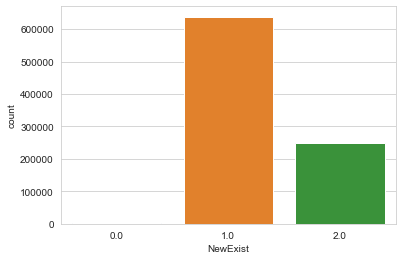

In [1401]:
sns.countplot(x='NewExist',data=sba)

In [1402]:
# records that are not 1 or 2, we can drop these rows as NewExist seems to have a bearing
sba = sba[(sba['NewExist'] == 1) | (sba['NewExist'] == 2)]
len(sba[(sba['NewExist'] != 1) & (sba['NewExist'] != 2)])

0

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>FranchiseCode</b></div>

In [1403]:
sba['FranchiseCode'].unique()

array([    1,     0, 15100, ...,  2899, 18701, 15930], dtype=int64)

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>UrbanRural</b></div>

In [1404]:
sba['UrbanRural'].unique()

array([0, 1, 2], dtype=int64)

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Term</b></div>

In [1405]:
print(len(sba[sba['Term'].isna()]))
print(len(sba[sba['Term']==0]))
print(len(sba[sba['Term']<0]))

0
801
0


In [1406]:
sba.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,1999-02-28,60000.0,$0.00,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,1997-05-31,40000.0,$0.00,P I F,0.0,40000.0,32000.0


In [1407]:
# Trim leading and trailing spaces
sba['City'] = sba['City'].str.strip()

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Check for na's in all columns</b></div>

['Bank', 'BankState', 'RevLineCr', 'ChgOffDate']


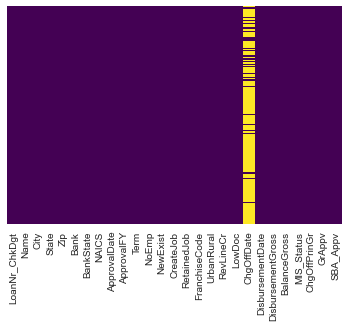

In [1408]:
check_cols_with_nulls(sba)

# We can ignore these, features to be dropped later

In [1409]:
len(sba)

887826

In [1410]:
# Save 2
def Save2():
    (sba.copy().reset_index(drop=True)).to_feather(savepath + "sba_save2.csv.feather")

    print('Saved to sba_save2.csv.feather')

Save2()
# Short circuiting
(kaggle_flag == 1) and FileLink(r'sba_save2.csv.feather')  # Kaggle only

Saved to sba_save2.csv.feather


<a id="drop_duplicates"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.3 Drop Duplicate Rows</h2>
    </div>

In [ ]:
sba.drop_duplicates(inplace=True)

<a id="create_new_features"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.4 Create New Features</h2>
    </div>

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Industry</b> - The industry sector is the 1st 2 digits of NAICS
    </div>

In [1411]:
sba['Industry'] = sba['NAICS'].str[0:2]
sba = sba.astype({'Industry':np.int32})

In [1412]:
sba['Industry'].head(2)

0    45
1    72
Name: Industry, dtype: int32

In [1413]:
sba['Industry'].unique()
# There is an invalid industry shown which is '0', caused by blank NAICS

array([45, 72, 62,  0, 33, 81, 23, 44, 42, 61, 53, 54, 31, 51, 71, 52, 21,
       32, 56, 48, 11, 92, 22, 49, 55])

In [1414]:
len(sba[sba['Industry'] == 0])
# This is a bummer, as industry sector has a big effect on a business, speaking as a business 
# domain expert.  Do we drop those with NAICS = 0 ?

200089

In [1415]:
# At this stage, we leave it as is and treat it as unknown industry
sba.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,Y,NaN,1999-02-28,60000.0,$0.00,P I F,0.0,60000.0,48000.0,45
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,Y,NaN,1997-05-31,40000.0,$0.00,P I F,0.0,40000.0,32000.0,72


In [1416]:
# Check if we can impute from the name.  For example, a bar (or similar) business
sba[(sba['Name'].str.contains('bar',case=False)) & (sba['Industry'] == 0)]\
    [['Name','Industry']].head(10)

,Name,Industry
692,DICKEY'S BARBECUE PIT,0
892,MID-STATE REBAR FABRICATORS,0
2763,"MCDUFFY'S SPORTS BAR, INC.",0
3488,PETRUCCI'S DAIRY BARN OF MARLT,0
3941,SEOUL BARBECUE RESTAURANT,0
4022,STEAMERS RAW BAR & SEA GRILLE,0
4748,QUALITY INN BARSTOW,0
7856,THE ISLANDS RAW BAR & GRILL,0
7895,SANTA BARBARA PERIPHERALS INC.,0
8047,M'S PLACE SMOKEHOUSE BARBEQUE,0


**It's not feasible to impute missing Industry codes efficiently, so we abandon the idea.**

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Recession</b><br>
We want to account for variation due to the Great Recession (December 2007 to June 2009). Should we separate the datasets into different time periods ? Before, During, and After ?  Let's check how large the sets are later.  In the meantime, we create a new feature, Recession, with 1 for 'Y' and 0 for 'N' depending on the DisbursementDate. 
<br><br>
</div>

In [1417]:
# Convert "DisbursementDate" to datetime

# sba['DisbursementDate'] = pd.to_datetime(sba['DisbursementDate'], format='%d-%b-%y')

# sba.head(2)

In [1418]:
# Create new column based on condition
sba['Recession'] = np.where((sba['DisbursementDate'] >= '2007-09-01')\
                     & (sba['DisbursementDate'] <= '2009-06-30'), 1, 0)

In [ ]:
print(f'Total - {len(sba)}')
y = len(sba[sba['Recession'] == 1])
n = len(sba[sba['Recession'] == 0])
print(f'Recession - {y}')
print(f'Not Recession - {n}')

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Real Estate</b><br>
Loans backed by real estate will have terms 20 years or greater (≥240 months) and are the only loans granted for such a long term, whereas loans not backed by real estate will have terms less than 20 years ( < 240 months).<br><br>
1 - Backed By Real Estate<br>
0 - Not Backed By Real Estate<br><br>

In [1420]:
# Create new column based on condition
sba['RealEstate'] = np.where(sba['Term'] >= 240, 1, 0)

In [1421]:
print(f'Total - {len(sba)}')
y = len(sba[sba['RealEstate'] == 1])
n = len(sba[sba['RealEstate'] == 0])
print(f'Yes - {y}')
print(f'No - {n}')
print(f'Yes and No - {y+n}')

Total - 887826
Yes - 150700
No - 737126
Yes and No - 887826


<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>SBA_Portion</b><br>
The portion which is the percentage of the loan that is guaranteed by SBA. This is derived by calculating the ratio of the amount of the loan SBA guarantees and the gross amount approved by the bank (SBA_Appv/GrAppv) * 100.<br><br></div>

In [1422]:
sba['SBA_Portion']=(sba['SBA_Appv']/sba['GrAppv']) * 100
sba.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,Recession,RealEstate,SBA_Portion
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,60000.0,$0.00,P I F,0.0,60000.0,48000.0,45,0,0,80.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,40000.0,$0.00,P I F,0.0,40000.0,32000.0,72,0,0,80.0


**CityState**

In [1423]:
sba["CityState"] = sba["City"] + "_" + sba["State"]
sba[["CityState", "City", "State"]].head()

,CityState,City,State
0,EVANSVILLE_IN,EVANSVILLE,IN
1,NEW PARIS_IN,NEW PARIS,IN
2,BLOOMINGTON_IN,BLOOMINGTON,IN
3,BROKEN ARROW_OK,BROKEN ARROW,OK
4,ORLANDO_FL,ORLANDO,FL


In [1424]:
sba.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,Recession,RealEstate,SBA_Portion,CityState
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,$0.00,P I F,0.0,60000.0,48000.0,45,0,0,80.0,EVANSVILLE_IN
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,$0.00,P I F,0.0,40000.0,32000.0,72,0,0,80.0,NEW PARIS_IN


In [1425]:
# Save 3
def Save3():
    (sba.copy().reset_index(drop=True)).to_feather(savepath + 'sba_save3.csv.feather')

    print('Saved to sba_save3.csv.feather')
    
Save3()
(kaggle_flag == 1) and FileLink(r'sba_save3.csv.feather')  # Kaggle only

Saved to sba_save3.csv.feather


<a id="encode_cat"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.5 Encode Categorical Features</h2>
    </div>

In [1427]:
sba.select_dtypes(["object"]).nunique()

Name            771232
City             32346
State               51
Bank              5791
BankState           56
NAICS             1311
ApprovalDate      9815
ApprovalFY          47
RevLineCr           18
LowDoc               2
ChgOffDate        6429
BalanceGross        15
MIS_Status           2
CityState        44196
dtype: int64

<div style="font-family: Trebuchet MS;background-color:Chocolate;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>MIS_Status</b><br>
    This will be the <b>target</b> variable</div>

P I F     732244
CHGOFF    155582
Name: MIS_Status, dtype: int64


<AxesSubplot:xlabel='MIS_Status', ylabel='count'>

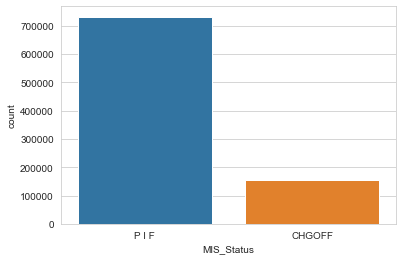

In [1428]:
sns.set_style('whitegrid')
# Target variable is MIS Status, a categorical variable

print(sba['MIS_Status'].value_counts())
sns.countplot(x='MIS_Status',data=sba)

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    This shows a skewed distribution, where this bias in the target can influence many machine learning algorithms, leading some to ignore the minority class entirely, in this case, CHGOFF.  Before oversampling the data, will try as is.<br><br></div>

In [1429]:
# Update column based on condition
sba['MIS_Status'] = np.where((sba['MIS_Status'] == 'P I F'), 1, 0)

In [1430]:
print(sba['MIS_Status'].dtype)
sba.head(2)[['City','MIS_Status']]

int32


,City,MIS_Status
0,EVANSVILLE,1
1,NEW PARIS,1


<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>LowDoc</b><br>
'Y' = 1<br>
'N' = 0

In [1431]:
# Update column based on condition
sba['LowDoc'] = np.where((sba['LowDoc'] == 'Y'), 1, 0)

sba.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,Recession,RealEstate,SBA_Portion,CityState
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,$0.00,1,0.0,60000.0,48000.0,45,0,0,80.0,EVANSVILLE_IN
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,$0.00,1,0.0,40000.0,32000.0,72,0,0,80.0,NEW PARIS_IN


<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Others</b></div>

In [1432]:
# will not hash 'City' as it is already covered by 'CityState'

def HashCol():
    cols_to_drop = []
    hash_constant = 900000   # fixed value so we can programmatically reproduce the hash when needed
    len_data=len(sba)
    for col in sba[['State','CityState']]:
        if sba[col].dtype == 'object':
            print(f'Column {col} has {sba[col].nunique()} values among {len_data}')

        if sba[col].nunique() < 25:
            print(f'One-hot encoding of {col}')
            one_hot_cols = pd.get_dummies(sba[col])
            for ohc in one_hot_cols.columns:
                sba[col + '_' + ohc] = one_hot_cols[ohc]
        else:
            print(f'Hashing of {col}')
            sba[col + '_hash'] = sba[col].apply(lambda row: int(hashlib.sha1((col + "_" + \
                                    str(row)).encode('utf-8')).hexdigest(), 16) % hash_constant)

        cols_to_drop.append(col)
    print(cols_to_drop)

HashCol()

Column State has 51 values among 887826
Hashing of State
Column CityState has 44196 values among 887826
Hashing of CityState
['State', 'CityState']


In [1433]:
sba.head(2)[['State','CityState','State_hash','CityState_hash']]

,State,CityState,State_hash,CityState_hash
0,IN,EVANSVILLE_IN,705173,717067
1,IN,NEW PARIS_IN,705173,639604


In [1434]:
sba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887826 entries, 0 to 899163
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      887826 non-null  int64         
 1   Name               887826 non-null  object        
 2   City               887826 non-null  object        
 3   State              887826 non-null  object        
 4   Zip                887826 non-null  int64         
 5   Bank               886328 non-null  object        
 6   BankState          886321 non-null  object        
 7   NAICS              887826 non-null  object        
 8   ApprovalDate       887826 non-null  object        
 9   ApprovalFY         887826 non-null  object        
 10  Term               887826 non-null  int64         
 11  NoEmp              887826 non-null  int64         
 12  NewExist           887826 non-null  float64       
 13  CreateJob          887826 non-null  int64   

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>TimeFrame</b><br>
Create a dataset for later use where we restrict the time frame to loans by excluding those disbursed after 2010 due to the fact the term of a loan is frequently 5 or more years.
    <br><br>

In [1435]:
sba_bef_2011 = sba[sba['DisbursementDate'] <= '2010-12-31'].copy()
len(sba_bef_2011[sba_bef_2011['DisbursementDate'] > '2010-12-31'])
len(sba_bef_2011[sba_bef_2011['DisbursementDate'] <= '2011-01-01'])

868663

<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Drop columns that are no longer needed<b></div>

In [1437]:
# Save 4
def Save4():
    (sba.copy().reset_index(drop=True)).to_feather(savepath + 'sba_save4.csv.feather')

    print('saved to sba_save4.csv.feather')

Save4()
(kaggle_flag == 1) and FileLink(r'sba_save4.csv.feather')  # Kaggle only

saved to sba_save4.csv.feather


In [1438]:
cols_to_drop = ['LoanNr_ChkDgt', 'Bank', 'BankState', 'ApprovalDate', \
                        'ApprovalFY', 'ChgOffDate', 'BalanceGross', 'NAICS', 'ChgOffPrinGr', \
                        'Name', 'RevLineCr', 'DisbursementDate', 'City', 'State', 'CityState',\
                         'GrAppv','Zip']

sba_bef_2011.drop(columns=cols_to_drop, inplace=True)

sba.drop(columns=cols_to_drop, inplace=True)

sba_bef_2011 = reduce_mem_usage(sba_bef_2011)

print()
sba = reduce_mem_usage(sba)

print()
print('Unneeded Columns Dropped')
print(sba.info())

Memory usage of dataframe is 102.72 MB

Memory usage after optimization is: 41.42 MB
Decreased by 59.7%

Memory usage of dataframe is 137.24 MB

Memory usage after optimization is: 74.58 MB
Decreased by 45.7%

Unneeded Columns Dropped
<class 'pandas.core.frame.DataFrame'>
Int64Index: 887826 entries, 0 to 899163
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               887826 non-null  int16  
 1   NoEmp              887826 non-null  int16  
 2   NewExist           887826 non-null  float32
 3   CreateJob          887826 non-null  int16  
 4   RetainedJob        887826 non-null  int16  
 5   FranchiseCode      887826 non-null  int32  
 6   UrbanRural         887826 non-null  int8   
 7   LowDoc             887826 non-null  int8   
 8   DisbursementGross  887826 non-null  float32
 9   MIS_Status         887826 non-null  int8   
 10  SBA_Appv           887826 non-null  float32
 11  Industry    

In [1439]:
def SaveBef2011():
    # Save sba_bef_2011
    ## save this dataset to working dir
    (sba_bef_2011.copy().reset_index(drop=True)).to_feather(savepath + "sba_bef_2011.csv.feather")

    print("saved to sba_bef_2011.csv.feather")

SaveBef2011()
(kaggle_flag == 1) and FileLink(r'sba_bef_2011.csv.feather')  # Kaggle only


saved to sba_bef_2011.csv.feather


In [ ]:
del sba_bef_2011
gc.collect()

In [25]:
# Save 5
def Save5():
    (sba.copy().reset_index(drop=True)).to_feather(savepath + 'sba_save5.csv.feather')

    print('saved to sba_save5.csv.feather')

Save5()
(kaggle_flag == 1) and FileLink(r'sba_save5.csv.feather')  # Kaggle only

saved to sba_save5.csv.feather


<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Check for Infinite Values<b></div>

In [1442]:
check_infinity_nan(sba,'sba')

checking for infinity

printing the count of infinity values
sba contains 0 infinite values

Does sba have Nan or Null values ?  False


<div style="font-family: Trebuchet MS;background-color:LightSteelBlue;color:Black;text-align: left;padding-top: 5px;padding-bottom: 5px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <b>Check Correlations</b></div>

[Text(0, 0.5, 'Term'),
 Text(0, 1.5, 'NoEmp'),
 Text(0, 2.5, 'NewExist'),
 Text(0, 3.5, 'CreateJob'),
 Text(0, 4.5, 'RetainedJob'),
 Text(0, 5.5, 'FranchiseCode'),
 Text(0, 6.5, 'UrbanRural'),
 Text(0, 7.5, 'LowDoc'),
 Text(0, 8.5, 'DisbursementGross'),
 Text(0, 9.5, 'MIS_Status'),
 Text(0, 10.5, 'SBA_Appv'),
 Text(0, 11.5, 'Industry'),
 Text(0, 12.5, 'Recession'),
 Text(0, 13.5, 'RealEstate'),
 Text(0, 14.5, 'SBA_Portion'),
 Text(0, 15.5, 'State_hash'),
 Text(0, 16.5, 'CityState_hash')]

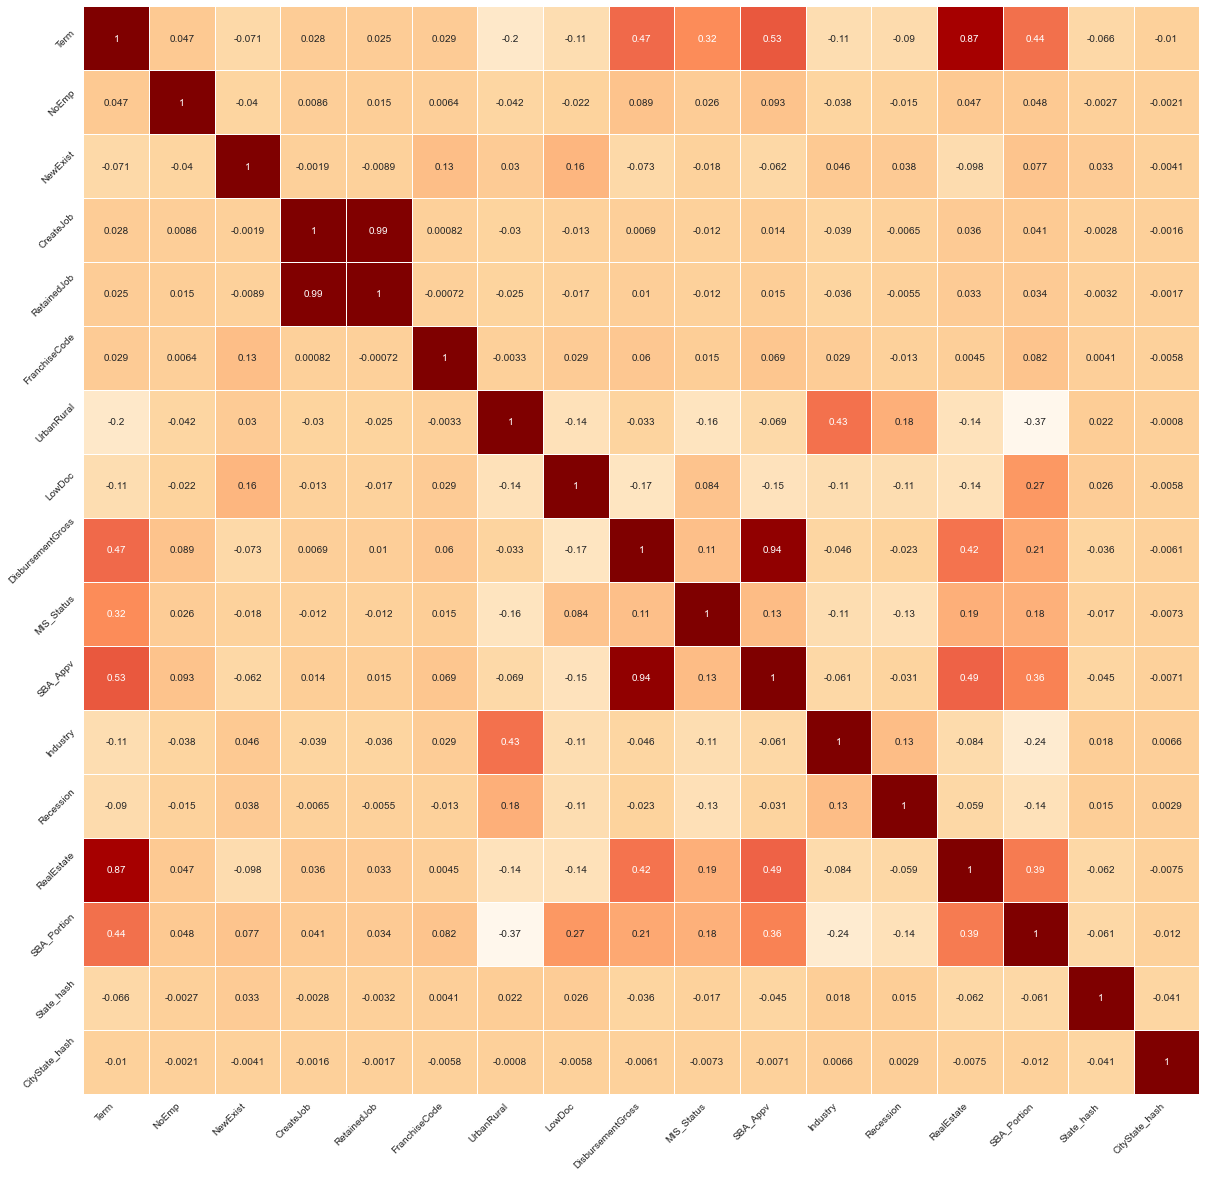

In [1443]:
fig, ax = plt.subplots(figsize=(20,20))

g = sns.heatmap(
    sba.corr(),
    annot=True,
    ax=ax,
    cmap='OrRd',
    cbar=False,
    linewidth=1
)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')

<a id="eda_check"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>2.6 EDA Check</h2><br>
    Here we generate SweetViz and DataPrep reports
    </div>

In [120]:
def GetSweetVizReport():
    my_report = sv.analyze(sba, target_feat = 'MIS_Status')
    
    my_report.show_html(filepath=savepath + 'SBA_sweetviz_report.html', 
            open_browser=True, 
            layout='vertical', 
            scale=None)

GetSweetVizReport()

print()

(kaggle_flag == 0) and print(f'SweetViz Report has been downloaded to path {savepath}')
    
(kaggle_flag == 1) and create_download_link('Open SweetViz Report in browser ---> ',\
                                            savepath + 'SBA_sweetviz_report.html')


                                             |                                             | [  0%]   00:00 ->…

Report C:\Python\Python_Data_Science_Exercises\datasets\SBA_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.

SweetViz Report has been downloaded to path C:\Python\Python_Data_Science_Exercises\datasets\


In [119]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report

def GetDataPrepReport():
    create_report(sba).show_browser()

# open html in browser, and from there, download using Save As, html    
GetDataPrepReport()

  0%|                                                                                         | 0/2848 [00:00<…

In [ ]:
del sba
gc.collect()

<a id="build_model"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3. Build Model Using XGBoost</h2>
    </div>

<a id="model1"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.1 Model v1</h2>
    </div>

In [64]:
%%time

def RunModelv1():
    # Select subset of predictors
    X = pd.read_feather(savepath + 'sba_save5.csv.feather')

    y = X.pop('MIS_Status')

    model1 = process_model(X, y)
    model1.prep_run_model(0.7, "Metrics : Full SBA Not Oversampled")
    print()
    
RunModelv1()

MIS_Status Count ->  1 : 732244, 0 : 155582

Shapes Before And After Splitting Dataset :
X (887826, 16)   y (887826,)
X_train (621478, 16)   y_train (621478,)
X_valid (133174, 16)   y_valid (133174,)
X_test (133174, 16)   y_test (133174,)

Please wait, Fitting model can take time ...
Fitting model completed.

Metrics : Full SBA Not Oversampled
MAE: 0.05820205145148452
RMSE: 0.24125101336882404

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83     23373
           1       0.96      0.97      0.96    109801

    accuracy                           0.94    133174
   macro avg       0.91      0.89      0.90    133174
weighted avg       0.94      0.94      0.94    133174


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 18737 times correctly   (85.75 %)
False Negative : CHGOFF (0) was predicted 3115 times incorrectly     (14.25 %)
True Positive : P I F (1) was predicted 106686 times correctly     (95.84 %)
F

<div class="alert alert-block alert-danger">  
<b>Accuracy for model is good; but ...</b> Precision, Recall, and f1-score of minority class 0 (CHGOFF) is <b>much lower</b> than that of 1 (P I F). This is because MIS_Status is heavily skewed towards 1 (P I F).</div>

<div class="alert alert-block alert-info">  
In such a scenario, <b>Accuracy is not a good metric</b>, as it favors the majority.  <b>The f1-score is the more ideal metric</b>, which correctly shows a poorer score by the minority class.<br><br>
    To solve this, we try <b>Oversampling the data</b>, in the next section.</div>

In [1446]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("SBA Machine Learning Model 1 completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<a id="oversample"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;"><h2 style='color:GhostWhite;'>3.2 OverSample</h2>
    </div>

<a id="model2"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;"><h2 style='color:GhostWhite;'>3.2.1 Model v2</h2>
    </div>

In [1487]:
%%time

def RunModelv2():
    # Select subset of predictors
    X = pd.read_feather(savepath + 'sba_save5.csv.feather')

    # Select target
    y = X.pop('MIS_Status')

    model2 = process_model(X, y)
    model2.osample()             # oversampling method
    model2_results = model2.prep_run_model(0.7, "Metrics : Full SBA Oversampled")

    return model2_results['xg_model']

modelv2 = RunModelv2()

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Shapes Before And After Splitting Dataset :
X (1428424, 16)   y (1428424,)
X_train (999896, 16)   y_train (999896,)
X_valid (214264, 16)   y_valid (214264,)
X_test (214264, 16)   y_test (214264,)

Please wait, Fitting model can take time ...


KeyboardInterrupt: 

<div class="alert alert-block alert-info">
    After oversampling of the minority class, class 0 (CHGOFF) <b>now has a similar </b> precision, recall, and f1-score as class 1 (P I F).
<br><br>     
    The <b>accuracy score</b> is slightly lower than when not oversampled, but much better f-scores.  This should be a good metric now as the target classification is no longer imbalanced.  <b>The model is now more accurate in predicting the target as f-scores are better now.</b></div>

In [1449]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("SBA Machine Learning Model 2 completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

In [ ]:
# Plot feature importance

plot_features(modelv2, (10,12))

<div class="alert alert-block alert-info">
    <b>Observation</b><br>
    I was hoping to see <b>Industry</b> at a much higher position here, but apparently the incomplete data on industry had an effect.<br><br>
Furthermore, <b>Recession</b> has to be at a very high position, but is at the bottom instead.  This could be due to <b>Recession</b> data being highly skewed towards 1 (Not Recession).<br><br>
<b>Real Estate</b> should have good importance too, but it may be highly skewed as well.

In [ ]:
del modelv2
gc.collect()

<a id="model3"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.2.2 Model v3</h2>
    <b>Build a Model Dataset Excluding Year 2011 and Above</b>

We restrict the time frame to loans by excluding those disbursed after 2010 due to the fact the term of a loan is frequently 5 or more years.
       </div>

In [111]:
%%time

def RunModelv3():
    X = pd.read_feather(savepath + "sba_bef_2011.csv.feather")

    # Select target
    y = X.pop('MIS_Status')

    model3 = process_model(X, y)
    model3.osample()
    model3_results = model3.prep_run_model(0.7, "Metrics : SBA Before 2011 Oversampled")

    return model3_results
    
model3_results = RunModelv3()

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Shapes Before And After Splitting Dataset :
X (1428424, 16)   y (1428424,)
X_train (999896, 16)   y_train (999896,)
X_valid (214264, 16)   y_valid (214264,)
X_test (214264, 16)   y_test (214264,)

Please wait, Fitting model can take time ...
Fitting model completed.

Metrics : SBA Before 2011 Oversampled
MAE: 0.07122521748870553
RMSE: 0.2668805303665022

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    107092
           1       0.93      0.92      0.93    107172

    accuracy                           0.93    214264
   macro avg       0.93      0.93      0.93    214264
weighted avg       0.93      0.93      0.93    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 99878 times correctly   (92.54 %)
False Negative : CHGOFF (0) was predicted 8047 

<div class="alert alert-block alert-info">
    <b>We get a similar score to Model 2.</b>  Will use this dataset as the last dataset, for now.</div>

In [1453]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("SBA Machine Learning Model 3 completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

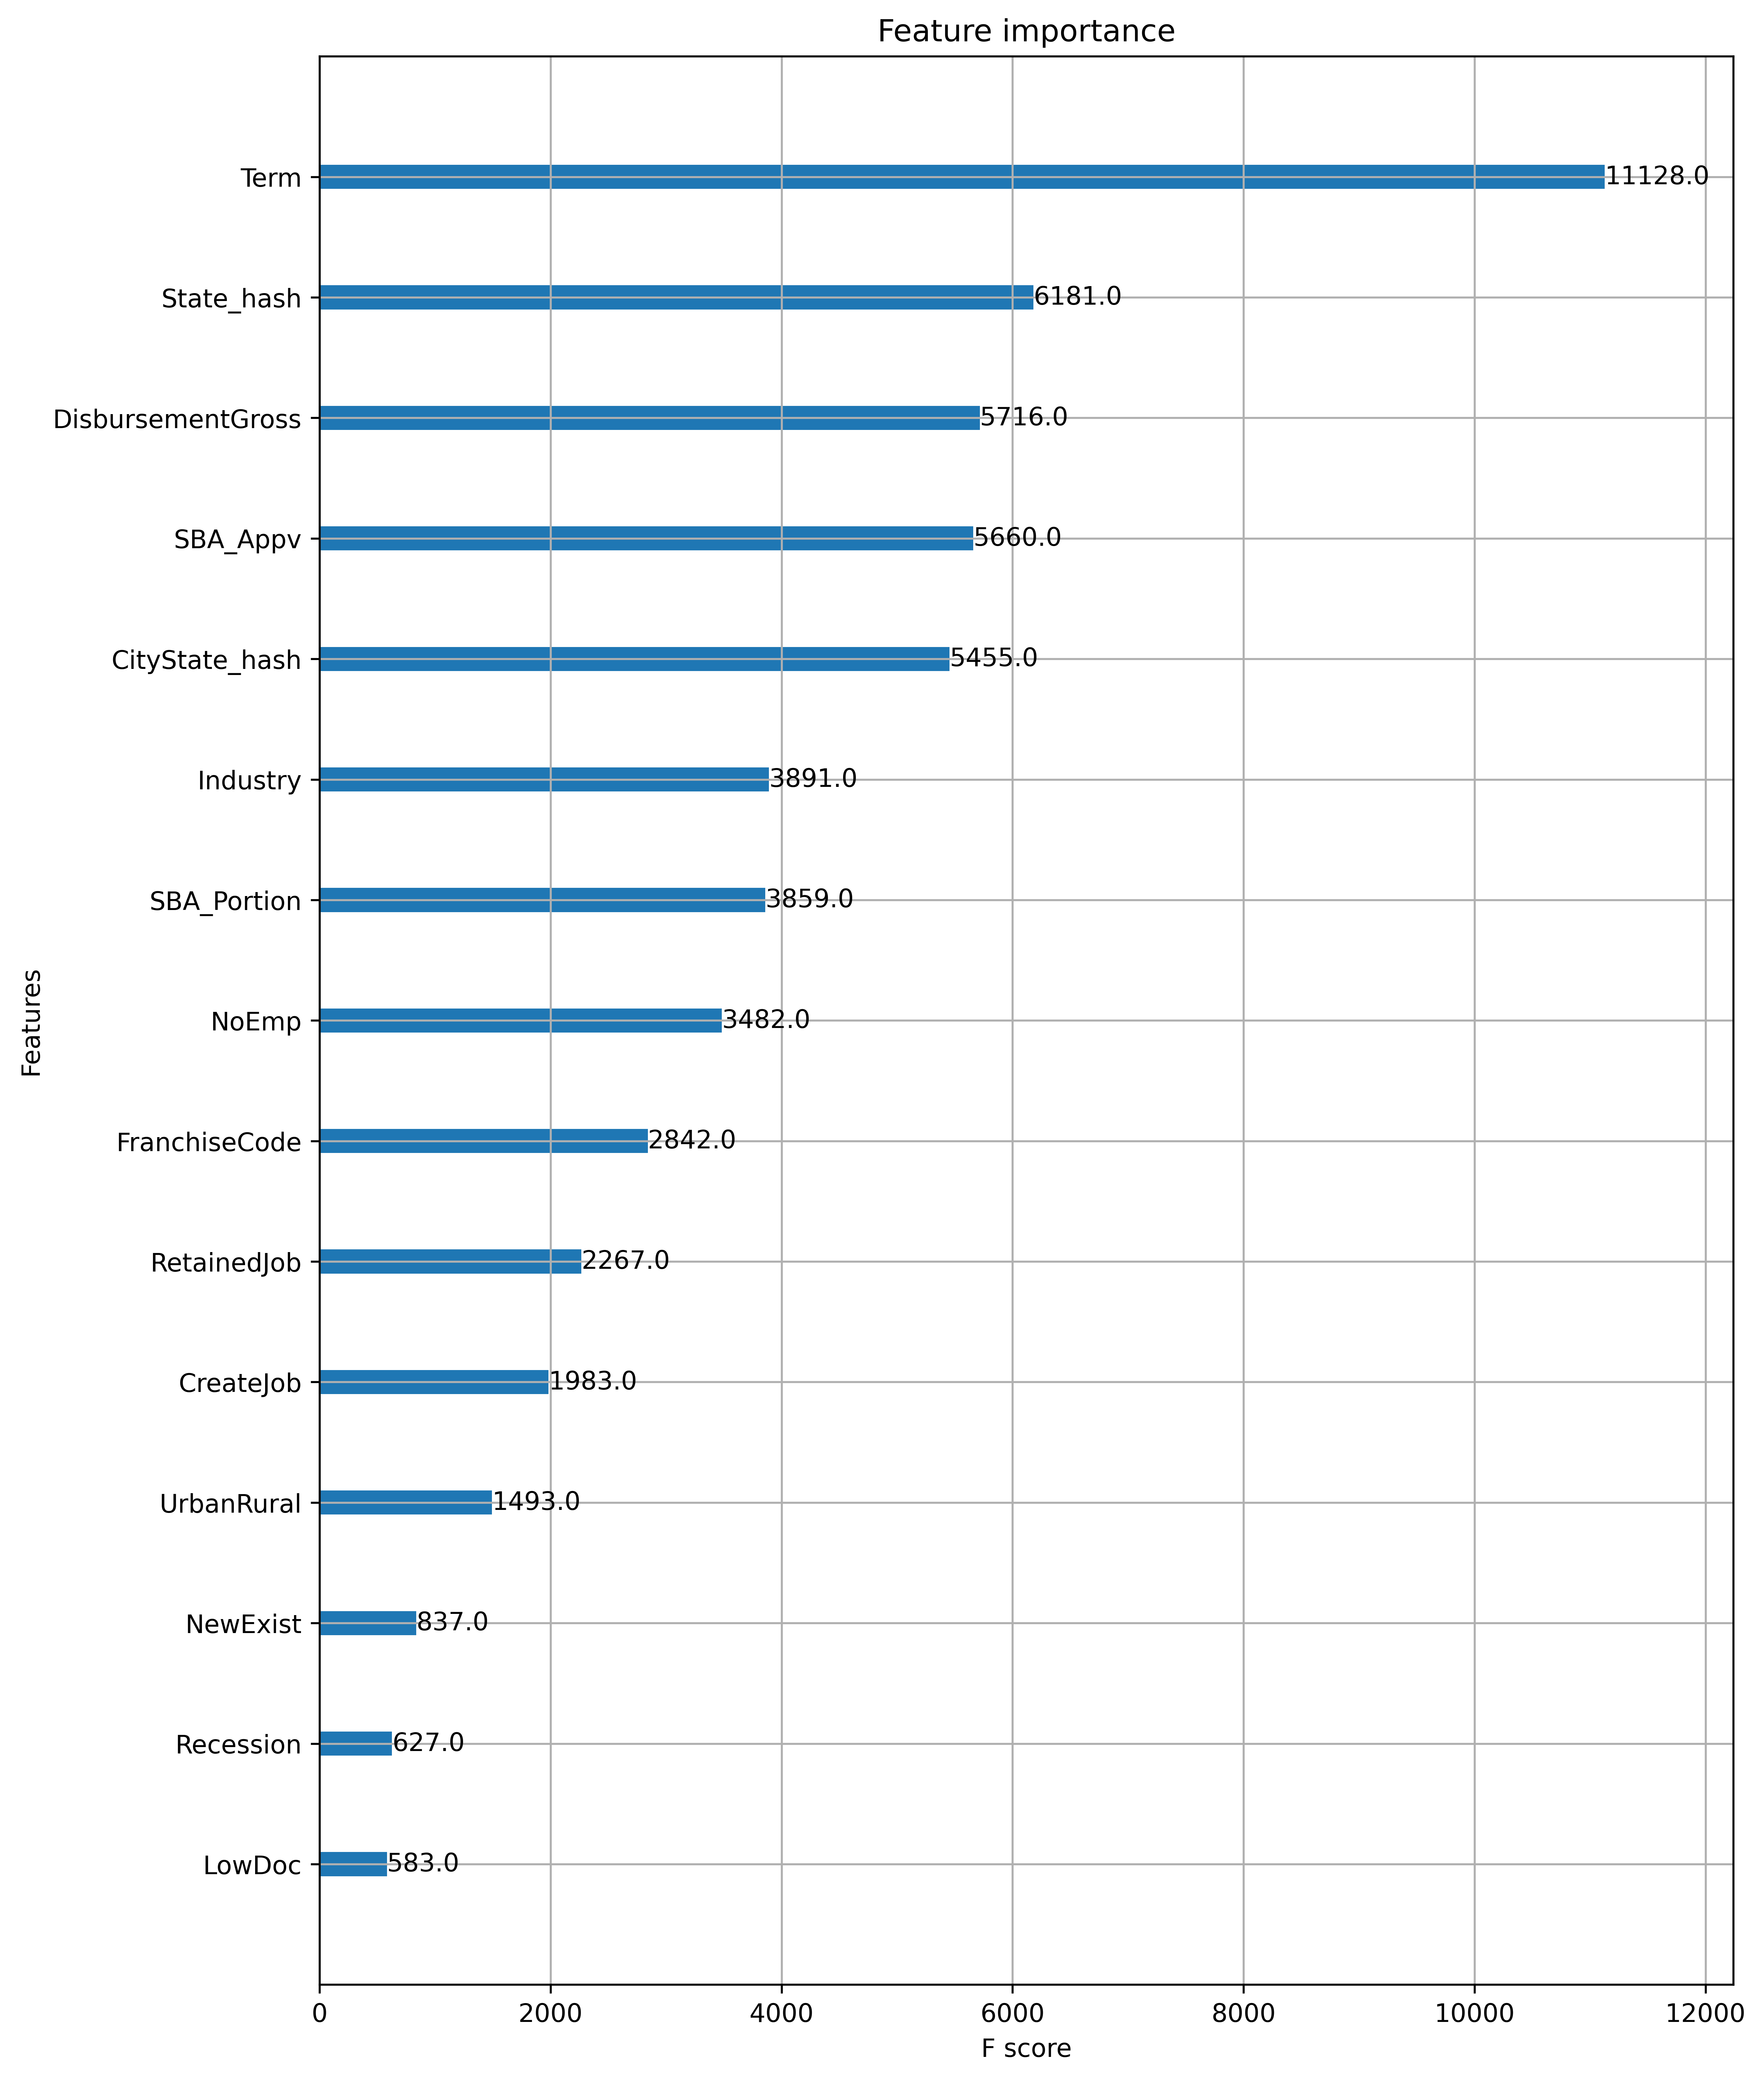

In [112]:
# Plot feature importance
modelv3 = model3_results['xg_model']
plot_features(modelv3, (10,14))

In [113]:
# Save 6 - final cleaned csv
def SaveFinalCsv():
    sdf = pd.read_feather(savepath + "sba_bef_2011.csv.feather")
    sdf.to_feather(savepath + 'sba_final.csv.feather')

    print('saved to sba_final.csv.feather')

SaveFinalCsv()
(kaggle_flag == 1) and FileLink(r'sba_final.csv.feather')  # Kaggle only

saved to sba_final.csv.feather


<a id="test_model"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>4. Test Model</h2>
    </div>
    

<a id="test_test_dataset"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>4.1 Test Model with Test Dataset</h2>
    Test Dataset was previously unseen by the model.
    </div>

In [114]:
X_test = model3_results['X_test']
y_test = model3_results['y_test']

In [115]:
# Get predictions
predictions = modelv3.predict(X_test)
model_eval(y_test, predictions);
#print() # to suppress printing return value of model_eval()

MAE: 0.07038513236007915
RMSE: 0.26530196448590265

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    107090
           1       0.93      0.93      0.93    107174

    accuracy                           0.93    214264
   macro avg       0.93      0.93      0.93    214264
weighted avg       0.93      0.93      0.93    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 100026 times correctly   (92.58 %)
False Negative : CHGOFF (0) was predicted 8017 times incorrectly     (7.42 %)
True Positive : P I F (1) was predicted 99157 times correctly     (93.35 %)
False Positive : P I F (1) was predicted 7064 times incorrectly     (6.65 %)

Accuracy for model: 92.96
f1-score:
   CHGOFF (0) : 92.99
   P I F (1)  : 92.93


<a id="test_user_input"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>4.2 Test Model with User Input</h2>
    </div>

<div class="alert alert-block alert-info">So let's assume the following are <b>the entries of a user</b>, through a user interface, looking for a prediction from our model.</div>

In [192]:
def UserInputTest():
    # 16 entries
    user_input =   {'Term':50, 
                    'NoEmp':0,
                    'NewExist':1,
                    'CreateJob':0 ,          
                    'RetainedJob':0,         
                    'FranchiseCode':1,       
                    'UrbanRural':0,           
                    'LowDoc':0,               
                    'DisbursementGross':50000,                 
                    'SBA_Appv':25000,          
                    'Industry':71, 
                    'Recession':0,
                    'RealEstate':0,           
                    'SBA_Portion':50,
                    'City':'EVANSVILLE',
                    'State':'IN'
                   }

    city = user_input['City']
    state = user_input['State']
    city_state = city + "_" + state

    state_hash = int(hashlib.sha1(('State' + "_" + \
                              str(state)).encode('utf-8')).hexdigest(), 16) % 900000
    city_state_hash = int(hashlib.sha1(('CityState' + "_" + \
                              str(city_state)).encode('utf-8')).hexdigest(), 16) % 900000

    print(f'State_hash = {state_hash}')
    print(f'CityState_hash = {city_state_hash}')

    user_input.pop('City')
    user_input.pop('State')
    user_input['State_hash'] = state_hash
    user_input['CityState_hash'] = city_state_hash

    user_input_list = list(user_input.values())
    
    return {'user_input':user_input, 'user_input_list':user_input_list}

user_input_param = UserInputTest()

print()
print(f'{color.bold}User Entry:{color.end}')
user_input_param['user_input']

State_hash = 705173
CityState_hash = 717067

User Entry:


{'Term': 50,
 'NoEmp': 0,
 'NewExist': 1,
 'CreateJob': 0,
 'RetainedJob': 0,
 'FranchiseCode': 1,
 'UrbanRural': 0,
 'LowDoc': 0,
 'DisbursementGross': 50000,
 'SBA_Appv': 25000,
 'Industry': 71,
 'Recession': 0,
 'RealEstate': 0,
 'SBA_Portion': 50,
 'State_hash': 705173,
 'CityState_hash': 717067}

In [117]:
# User Input test 1
def UserInputTest1():
    features = np.array([user_input_param['user_input_list']])   

    # using inputs to predict the output
    pred = modelv3.predict(features)
    if pred[0] == 1:
        print(f'{color.bdblue}Prediction: Approve The Loan{color.end}')
    else:
        print(f'{color.bdred}Prediction: Do Not Approve The Loan{color.end}')
        
UserInputTest1()

Prediction: Do Not Approve The Loan


In [118]:
# User Input test 2
def UserInputTest2():
    '''
    # if one wants to edit the list from the previous cell
    user_input2_list = user_input_list[:]   # make a copy
    user_input2_list[0] = 500          # change term 
    '''

    user_input2 = copy.deepcopy(user_input_param['user_input'])
    user_input2['Term'] = 500     # change term
    user_input2_list = list(user_input2.values())

    features = np.array([user_input2_list]) 

    # using inputs to predict the output
    pred = modelv3.predict(features)
    if pred[0] == 1:
        print(f'{color.bdblue}Prediction: Approve The Loan{color.end}')
    else:
        print(f'{color.bdred}Prediction: Do Not Approve The Loan{color.end}')
        
UserInputTest2()

Prediction: Approve The Loan


<div style="font-family: Trebuchet MS;background-color:HoneyDew;color:Black;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;border: 5px solid CadetBlue;"><b>Predictions:</b><br>
    
- 1 -> can approve<br>
- 0 -> do not approve<br>

Of course, in real life, will need to check further using other data (e.g. financial statements, kind of real estate, etc.) or other data's models if available.

In [119]:
del X_test, y_test, user_input_param
gc.collect()

8098

<a id="mutual_info"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>5. Mutual Information Scores</h2>
 "A general-purpose metric, normally used before selecting and building a model, but used here in the end, for comparison.  Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships."
    </div>

In [122]:
%%time

def GetMIScores():
    X = pd.read_feather(savepath + "sba_final.csv.feather")

    # Select target
    y = X.pop('MIS_Status')

    model_mi = process_model(X, y)
    osample_xy = model_mi.osample()
    mi_scores = make_mi_scores(osample_xy['X_over'], osample_xy['y_over'])

    print()
    return mi_scores

mi_scores = GetMIScores()

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Please wait, Mutual Information gathering can take time ...
Mutual Information gathering done ...

Wall time: 5min 45s


In [1464]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("SBA Mutual Information completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

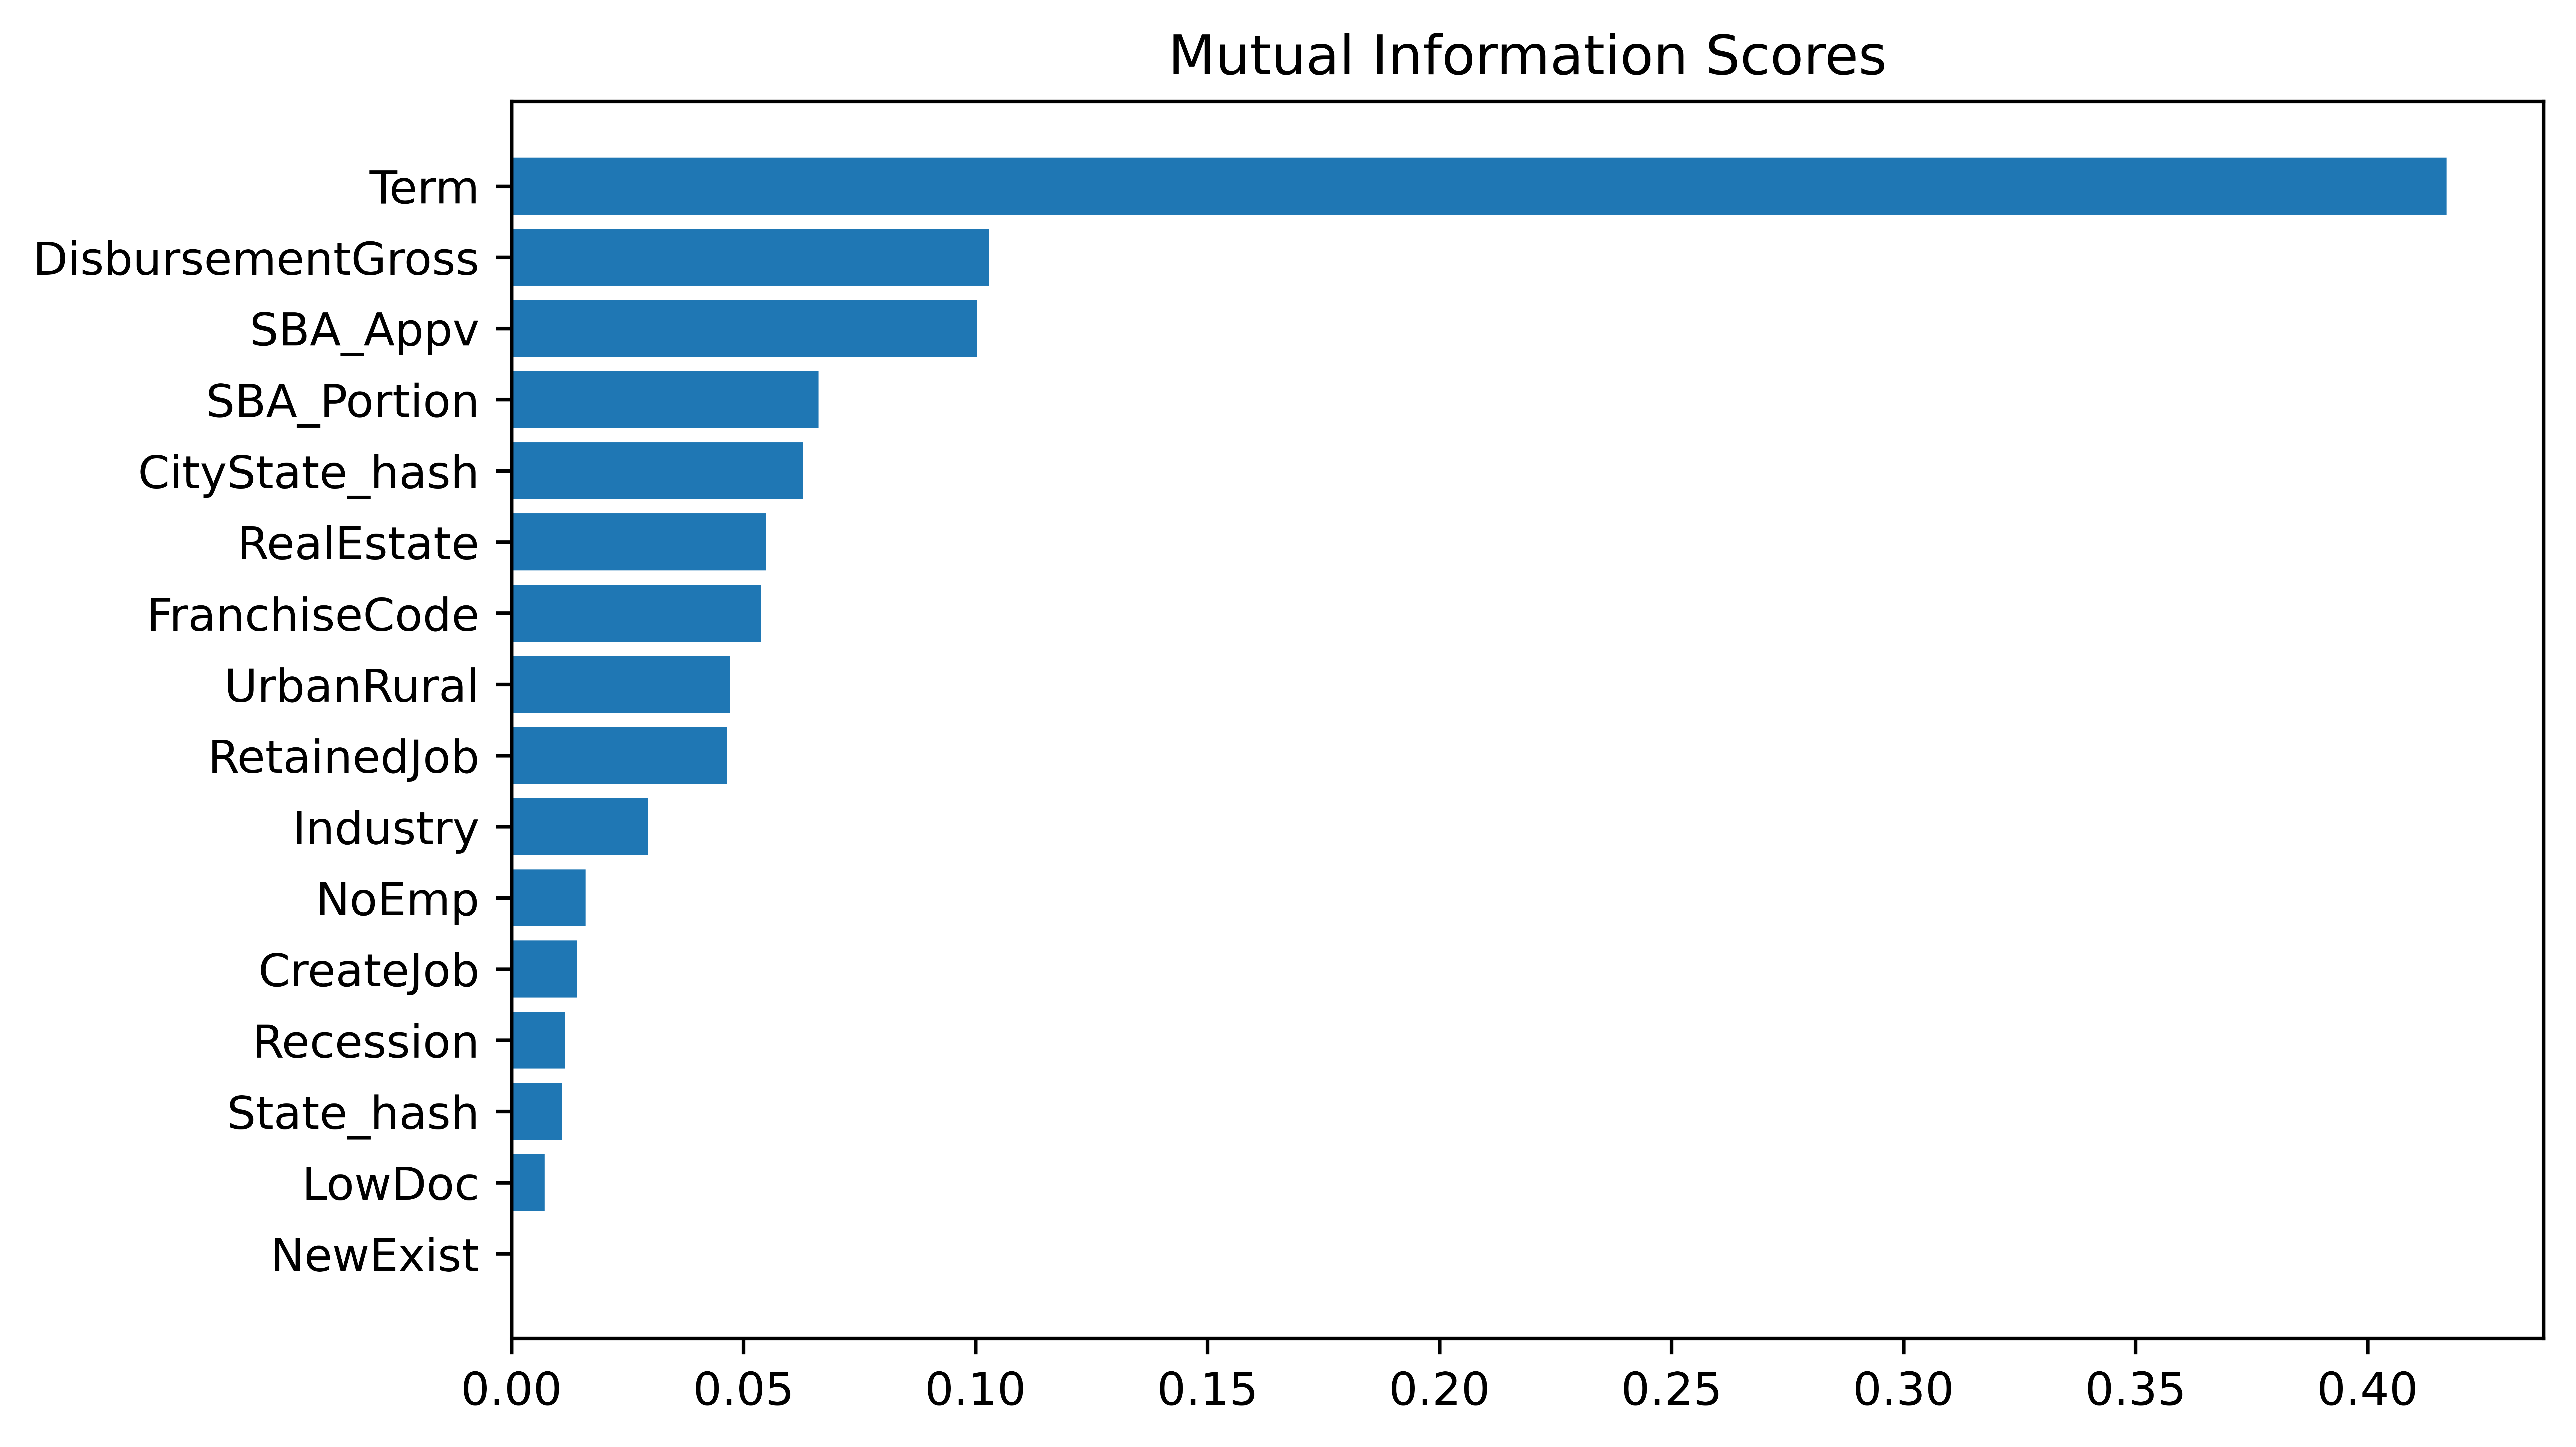

In [123]:
plt.figure(dpi=1200, figsize=(8, 5))
plot_mi_scores(mi_scores)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

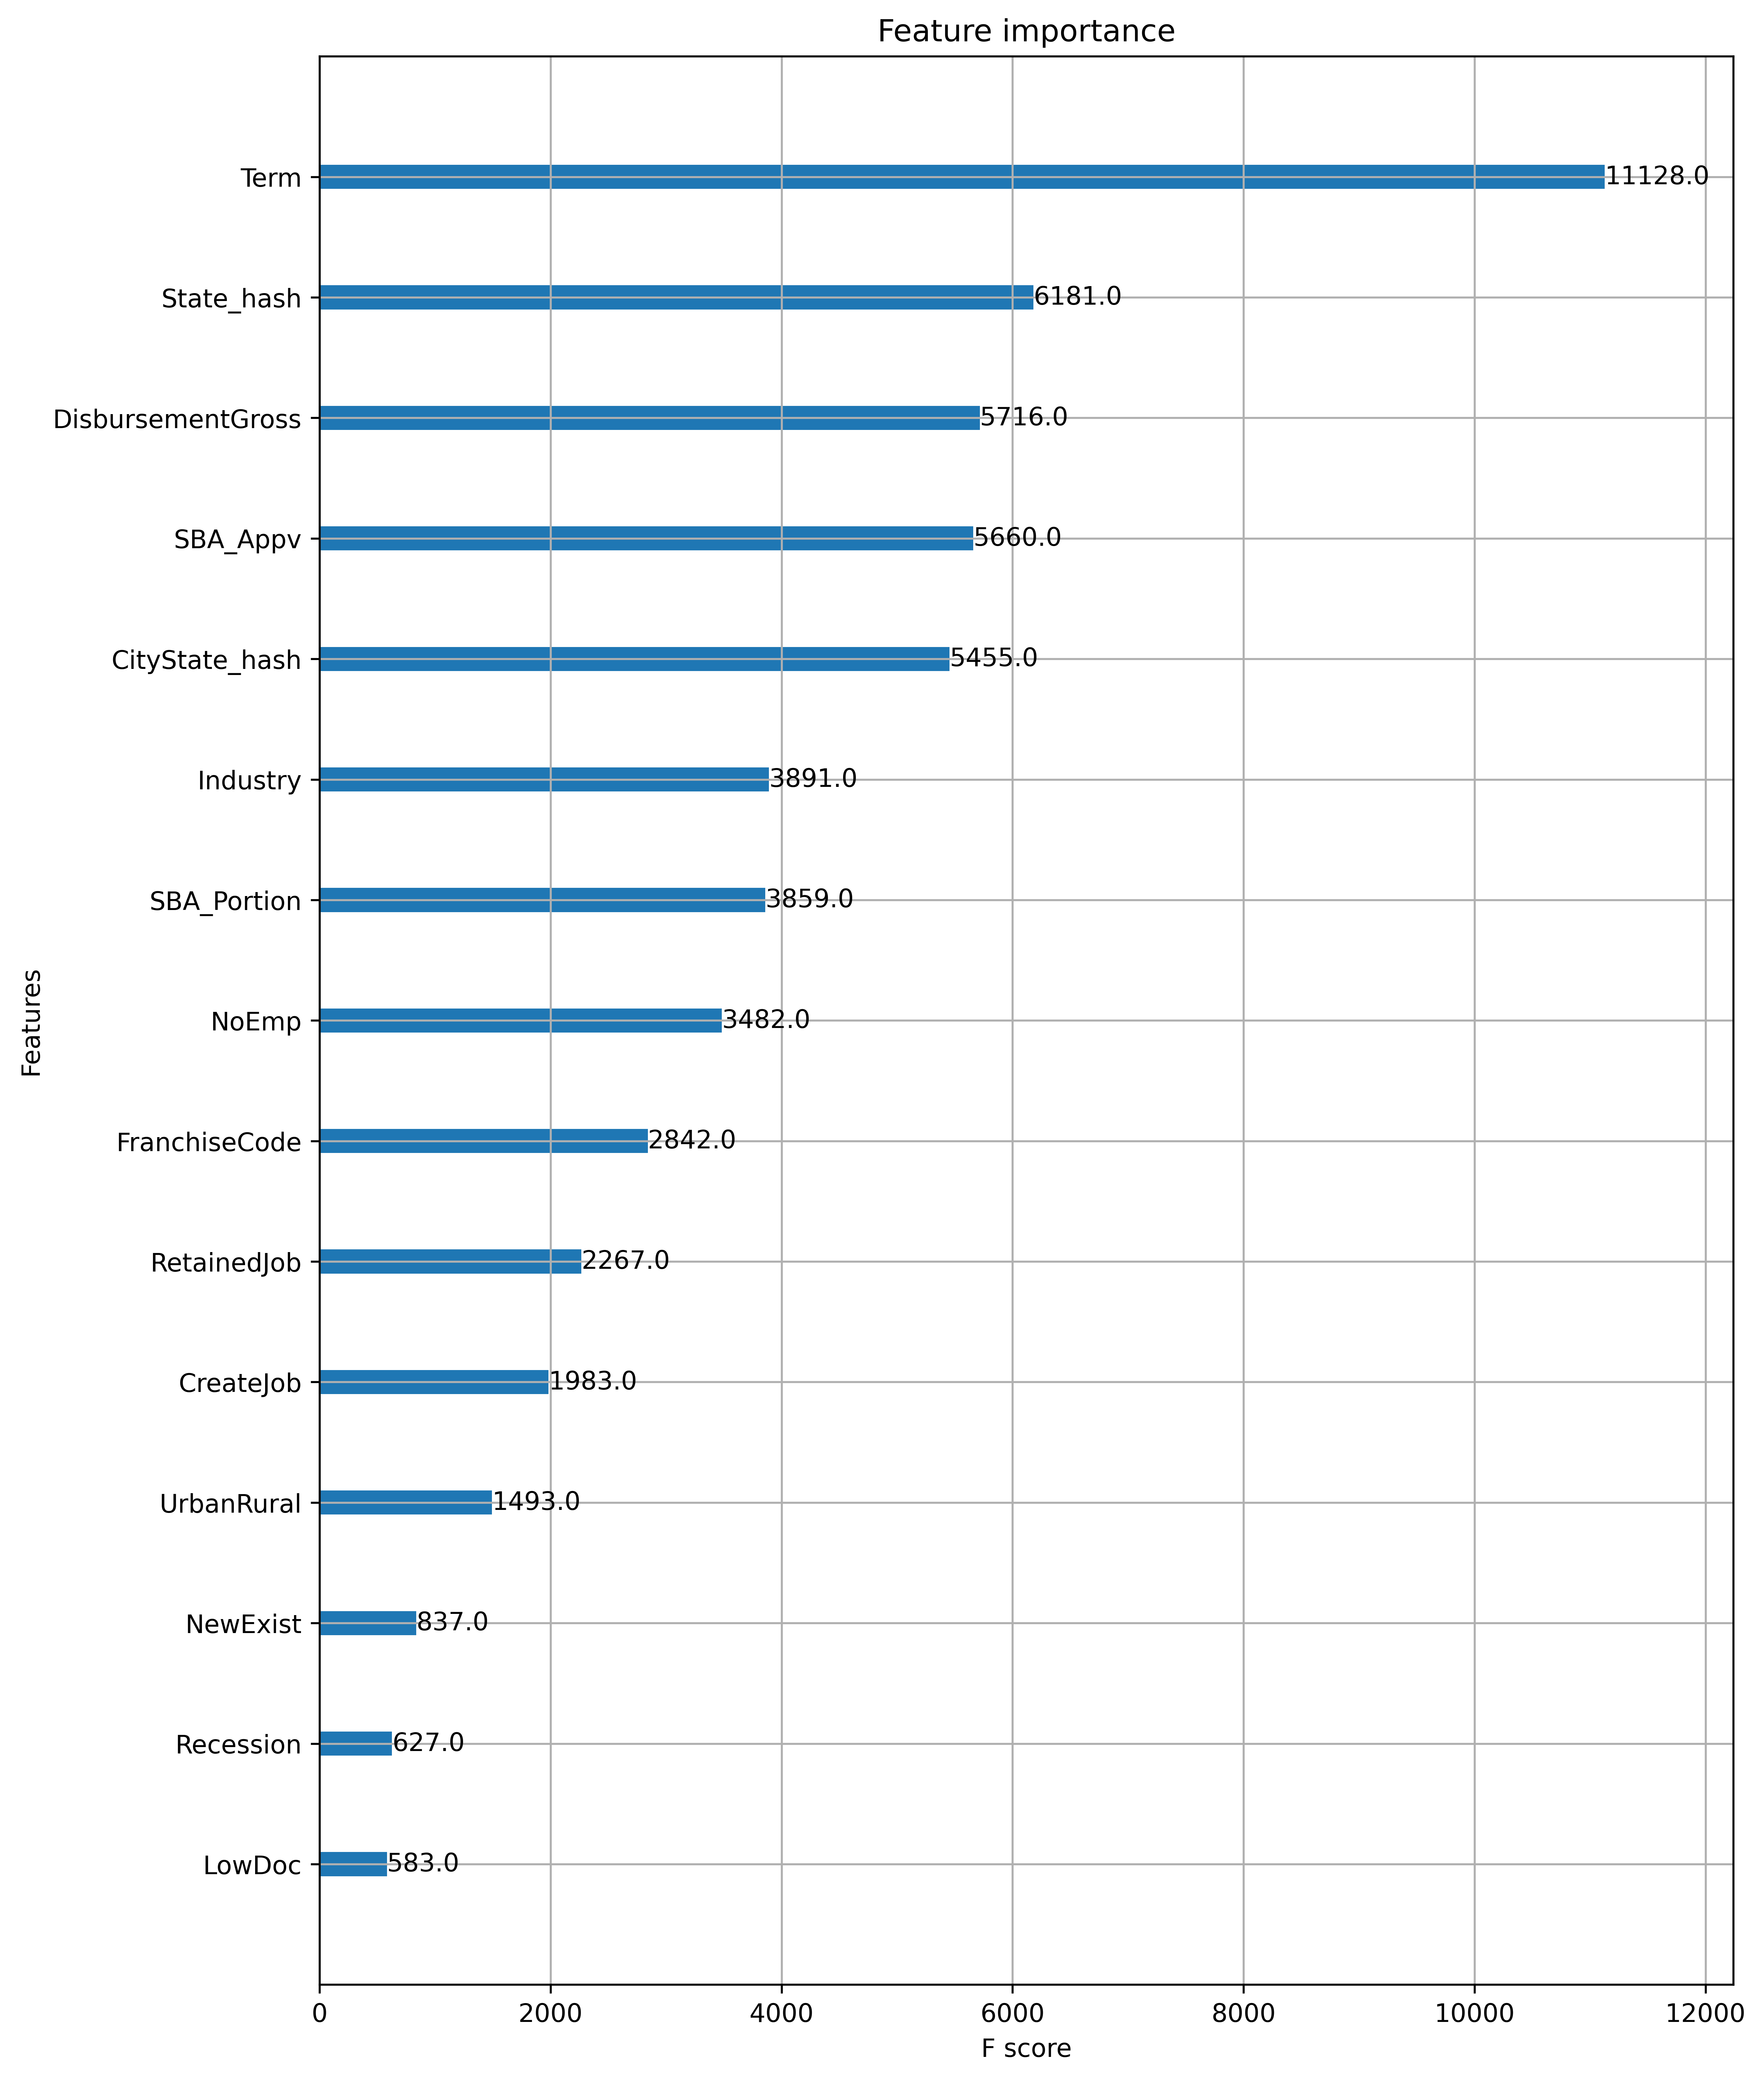

In [124]:
# Plot feature importance
plot_features(modelv3, (10,14))

In [125]:
del mi_scores
gc.collect()

4611

<div class="alert alert-block alert-info">
The importance ranked by <b>Mutual Information</b> and <b>XGBoost Feature Importance</b> metrics are different.  Which ranking do you think is more reasonable ?</div>

<a id="trim_dataset"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>6. Trim Dataset</h2><br>
After the preprocessing and encoding steps, not all of the features may be useful in forecasting the loan default. Alternatively we can select the <b>top 5 or top 8 features</b>, based on the feature importance plot above, which had a major contribution in forecasting loan defaults.<br><br>

If the model performance is similar in both the cases, that is – by using all the features and by using 5-8 features, then we should use only the top 8 features, in order to keep the model simpler and more efficient.

The idea is to have a less complex model without compromising on the overall model performance.
</div>

In [128]:
X = pd.read_feather(savepath + "sba_final.csv.feather")
print(X.shape)

# Select target
y = X.pop('MIS_Status')

#Let's retain the top 8 from Mutual Information metric 
mi_features = ['Term', 'DisbursementGross', 'SBA_Appv', 'SBA_Portion',\
                'CityState_hash', 'FranchiseCode', 'RealEstate', 'UrbanRural']

Xmi = X[mi_features]

#Let's retain the top 8 from Feature Importance metric 
fi_features = ['Term', 'SBA_Appv', 'DisbursementGross', 'CityState_hash', 'State_hash',\
                'SBA_Portion', 'Industry', 'NoEmp']

Xfi = X[fi_features]

(868663, 17)


In [129]:
%%time

def ModelMI():
    model_mi = process_model(Xmi, y)
    model_mi.osample()
    model_mi_results = model_mi.prep_run_model(0.7, "Mutual Information Metrics")

    print()
    return model_mi_results

model_mi_results = ModelMI()

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Shapes Before And After Splitting Dataset :
X (1428424, 8)   y (1428424,)
X_train (999896, 8)   y_train (999896,)
X_valid (214264, 8)   y_valid (214264,)
X_test (214264, 8)   y_test (214264,)

Please wait, Fitting model can take time ...
Fitting model completed.

Mutual Information Metrics
MAE: 0.07990609715117798
RMSE: 0.2826766653814531

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    107092
           1       0.92      0.92      0.92    107172

    accuracy                           0.92    214264
   macro avg       0.92      0.92      0.92    214264
weighted avg       0.92      0.92      0.92    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 98955 times correctly   (91.68 %)
False Negative : CHGOFF (0) was predicted 8984 times incorrect

In [1469]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("Trimmed Dataset by Mutual Information completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

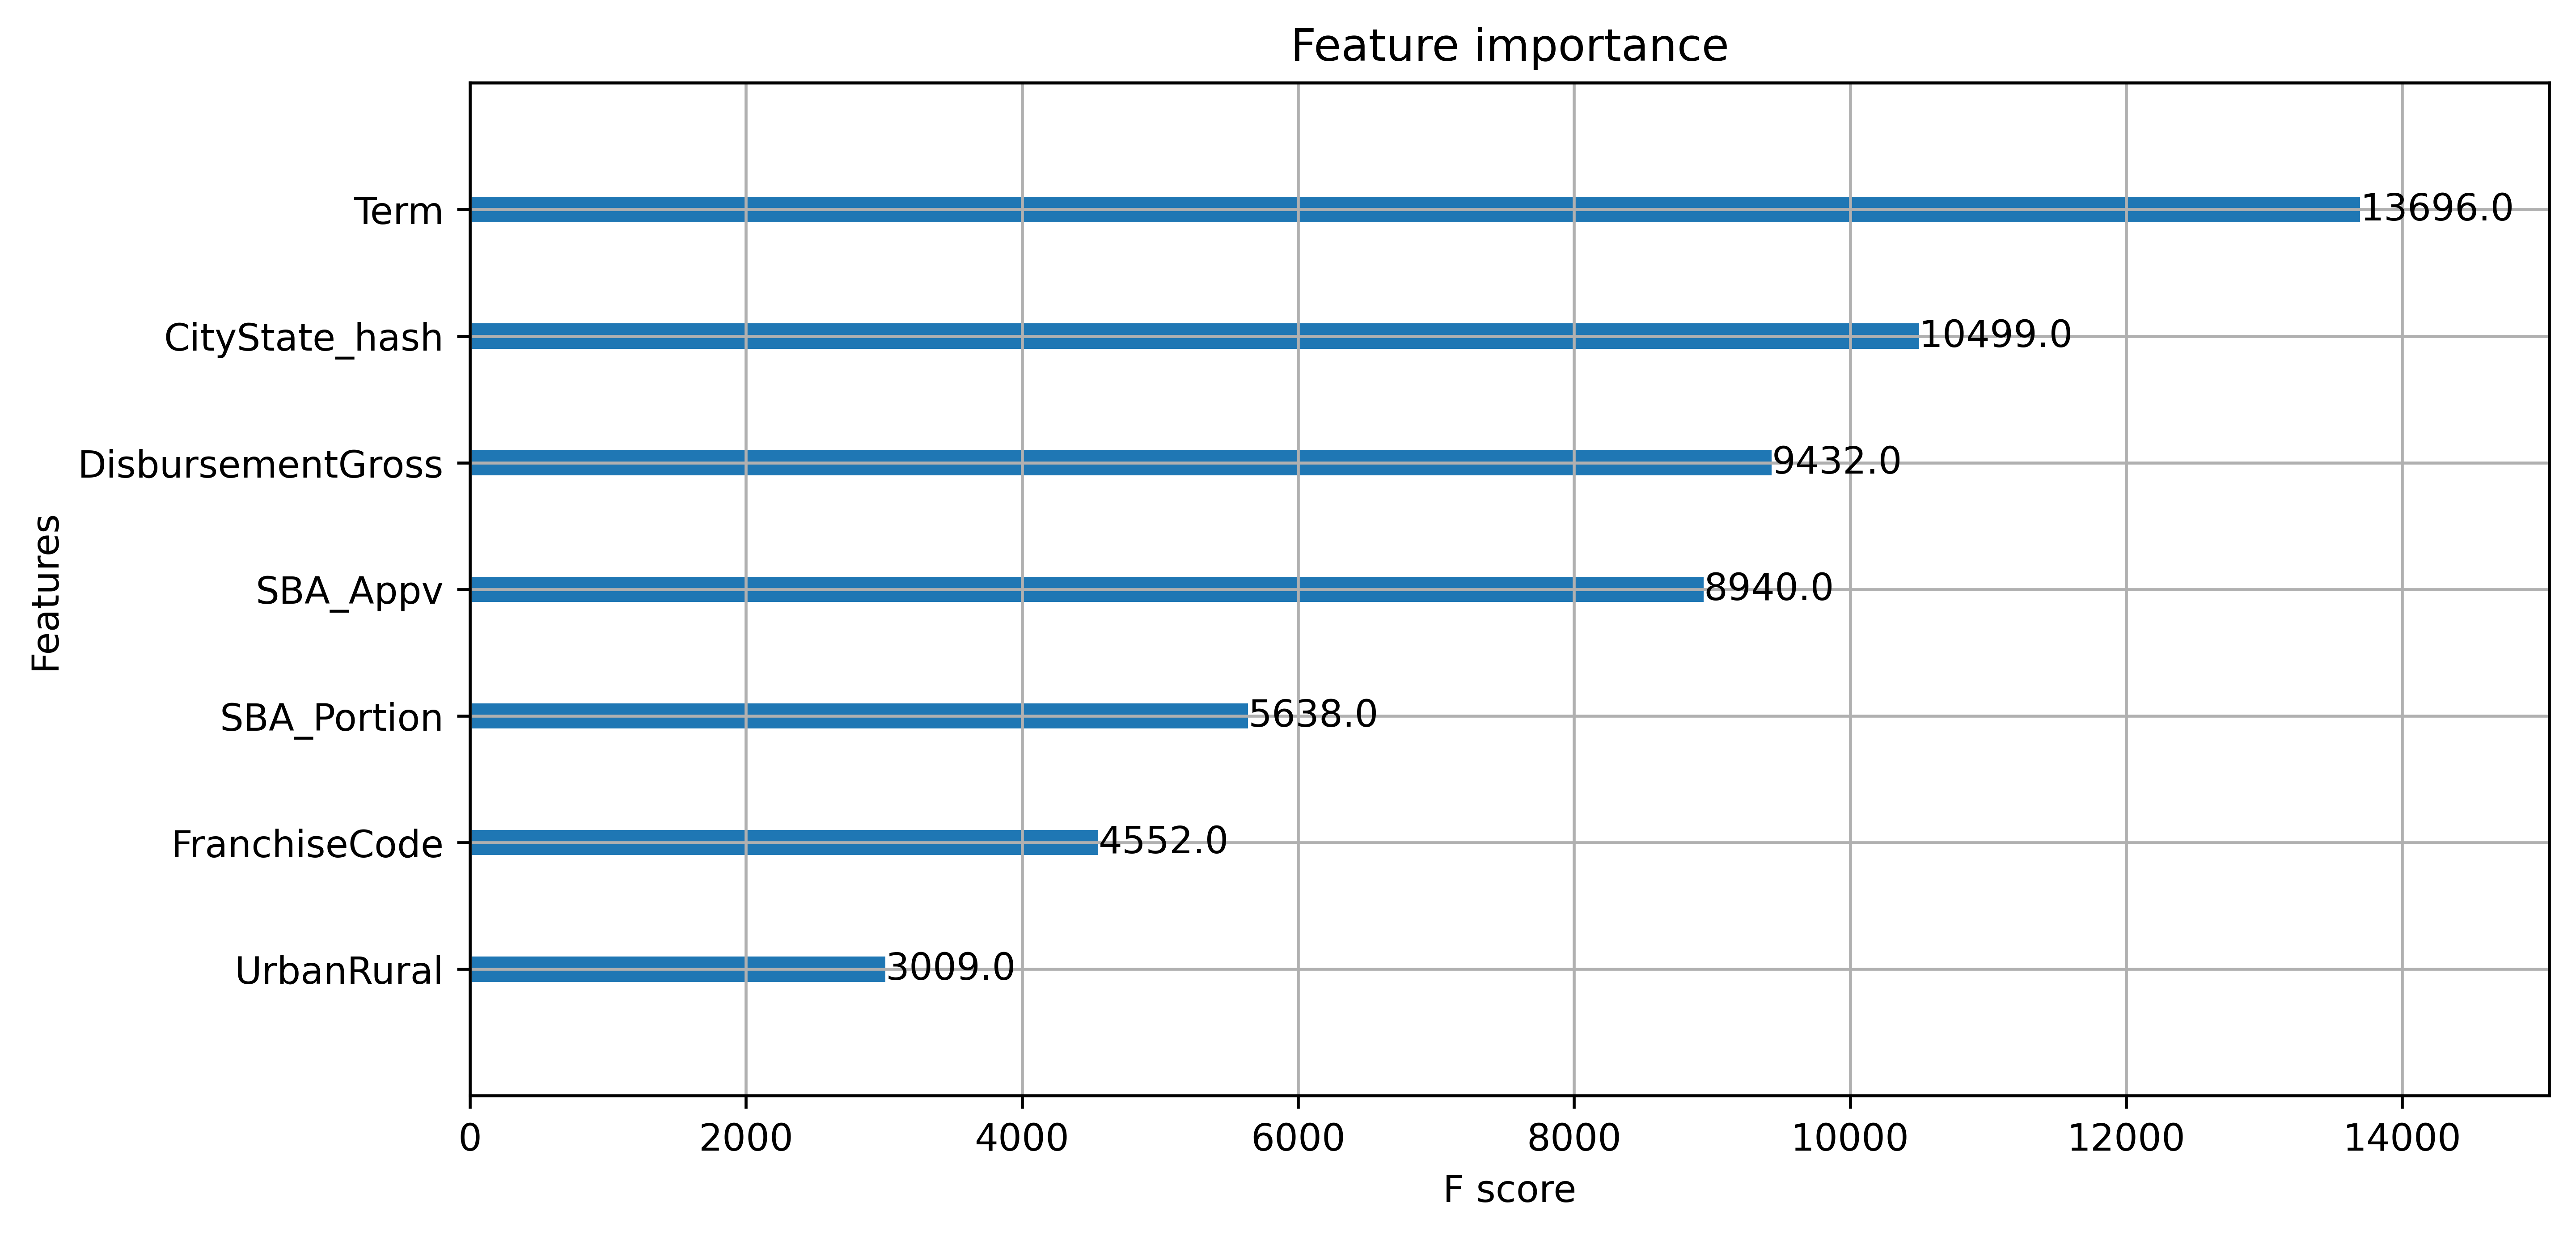

In [130]:
# Plot mutual information
my_model_mi = model_mi_results['xg_model']
plot_features(my_model_mi, (10,5))

In [131]:
# Test with Unseen test data
def MI_Model_On_Test_Data():
    X_test = model_mi_results['X_test']
    X_test_mi = X_test[mi_features]

    y_test = model_mi_results['y_test']

    predictions_mi = my_model_mi.predict(X_test_mi)
    model_eval(y_test, predictions_mi)
    print()
    
MI_Model_On_Test_Data()

MAE: 0.07904734346413769
RMSE: 0.2811535940800645

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92    107090
           1       0.92      0.92      0.92    107174

    accuracy                           0.92    214264
   macro avg       0.92      0.92      0.92    214264
weighted avg       0.92      0.92      0.92    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 99078 times correctly   (91.74 %)
False Negative : CHGOFF (0) was predicted 8925 times incorrectly     (8.26 %)
True Positive : P I F (1) was predicted 98249 times correctly     (92.46 %)
False Positive : P I F (1) was predicted 8012 times incorrectly     (7.54 %)

Accuracy for model: 92.10
f1-score:
   CHGOFF (0) : 92.13
   P I F (1)  : 92.06



In [140]:
%%time

def ModelFI():
    model_fi = process_model(Xfi, y)
    model_fi.osample()
    model_fi_results = model_fi.prep_run_model(0.7, "Feature Importance Metrics")

    print()
    return model_fi_results
    
model_fi_results = ModelFI()

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Shapes Before And After Splitting Dataset :
X (1428424, 8)   y (1428424,)
X_train (999896, 8)   y_train (999896,)
X_valid (214264, 8)   y_valid (214264,)
X_test (214264, 8)   y_test (214264,)

Please wait, Fitting model can take time ...
Fitting model completed.

Feature Importance Metrics
MAE: 0.08299107642907814
RMSE: 0.28808171831804624

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    107092
           1       0.92      0.92      0.92    107172

    accuracy                           0.92    214264
   macro avg       0.92      0.92      0.92    214264
weighted avg       0.92      0.92      0.92    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 98136 times correctly   (91.75 %)
False Negative : CHGOFF (0) was predicted 8826 times incorrec

In [1473]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("Trimmed Dataset by Feature Importance completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

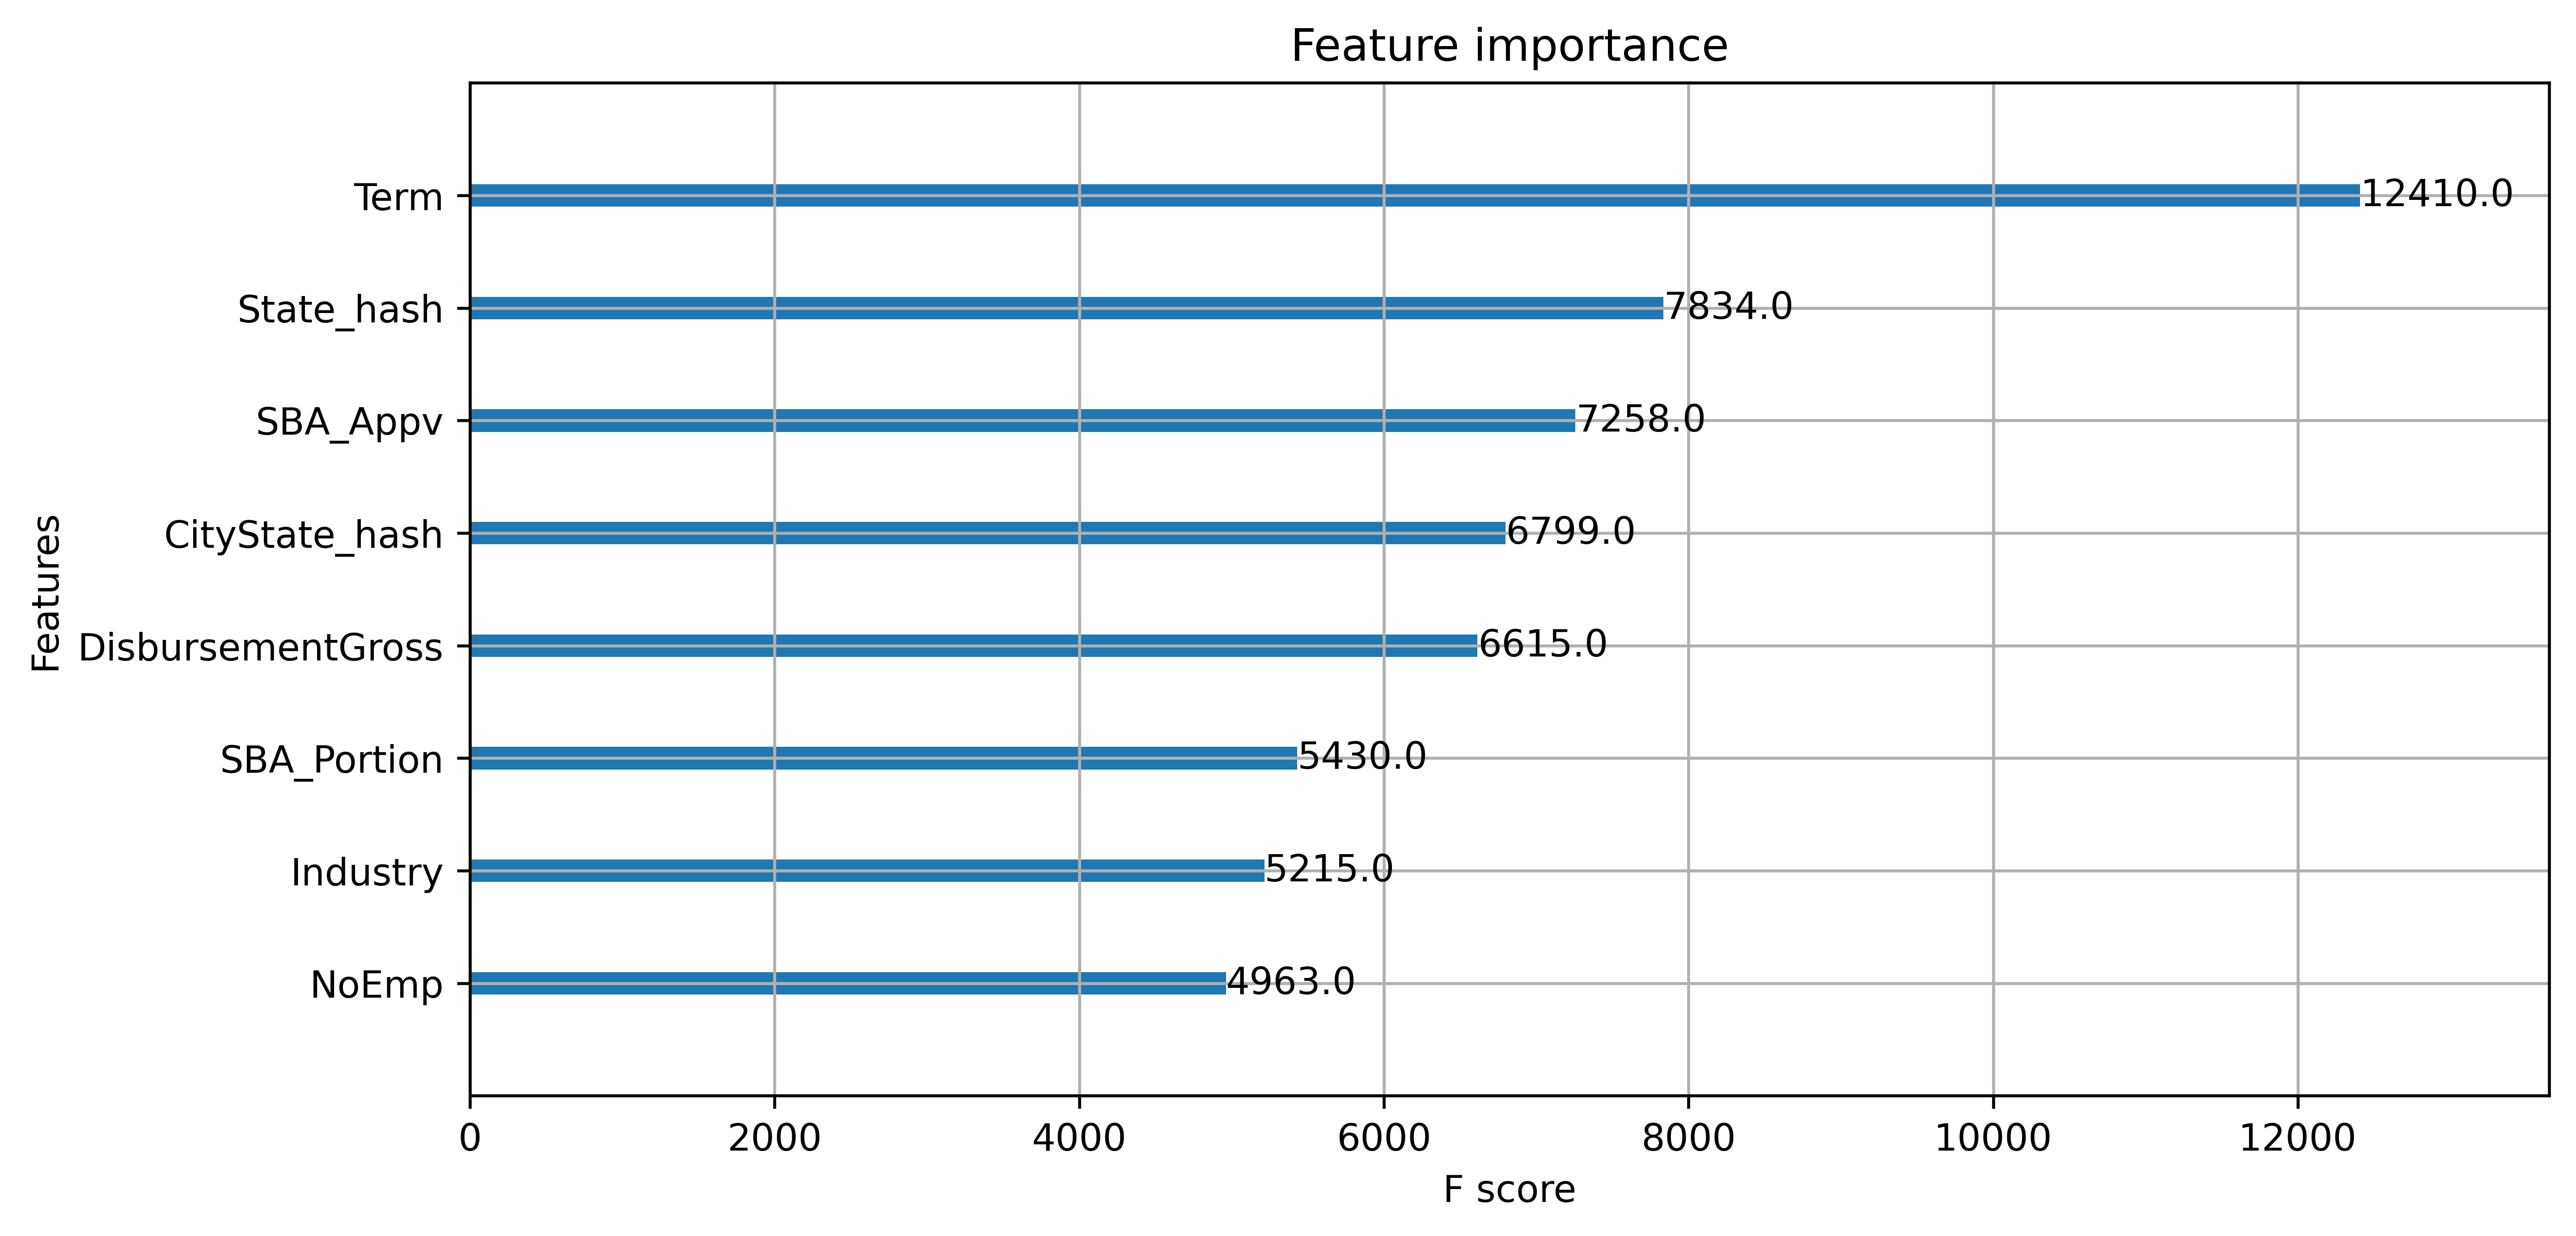

In [141]:
# Plot feature importance
my_model_fi = model_fi_results['xg_model']
plot_features(my_model_fi, (10,5))

In [142]:
# Test with Unseen test data
def FI_Model_On_Test_Data():
    X_test = model_fi_results['X_test']
    X_test_fi = X_test[fi_features]

    y_test = model_fi_results['y_test']

    predictions_fi = my_model_fi.predict(X_test_fi)
    model_eval(y_test, predictions_fi)
    print()
    
FI_Model_On_Test_Data()

MAE: 0.08174495015494904
RMSE: 0.2859107380896161

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    107090
           1       0.92      0.92      0.92    107174

    accuracy                           0.92    214264
   macro avg       0.92      0.92      0.92    214264
weighted avg       0.92      0.92      0.92    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 98239 times correctly   (91.9 %)
False Negative : CHGOFF (0) was predicted 8664 times incorrectly     (8.1 %)
True Positive : P I F (1) was predicted 98510 times correctly     (91.76 %)
False Positive : P I F (1) was predicted 8851 times incorrectly     (8.24 %)

Accuracy for model: 91.83
f1-score:
   CHGOFF (0) : 91.82
   P I F (1)  : 91.84



In [143]:
del X, y, Xmi, Xfi, mi_features, fi_features, my_model_mi, my_model_fi
del model_mi_results, model_fi_results
gc.collect()

8

<a id="results1"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>7. Full or Trimmed Dataset</h2>
</div>

<div class="alert alert-block alert-info">
    <b>Do we select the full dataset, or the trimmed dataset ?</b><br><br>
    <b>Observation:</b><br>
    <ul>
        <li><b>Accuracy</b> - Approx 2 points less accuracy of trimmed versus the full features dataset.<br><br>
        <li><b>f1-score</b> - Also approx 2 points less f1-score between full features dataset and Manual Information trimmed dataset.  Approx 1 point difference between full features dataset and Feature Importance trimmed dataset.<br><br>
    </ul>
    We can <b>stick with the full features</b> for now; but the trimmed features are also good, with the <b>Manual Information trimmed dataset</b> very slightly favored.

In [1476]:
if alert_flag == 1:
    if kaggle_flag == 0:
        engine.say("SBA Machine Learning completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<a id="part3"></a>
<div style="font-family: Trebuchet MS;background-color:DarkRed;color:AliceBlue;text-align: left;padding-top: 5px;padding-bottom: 15px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
<h1 style='color:GhostWhite;'>Part 3. XGBoost HyperParameter Tuning using Optuna</h1>
</div>

<a id="find_best_hp"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.1 Find The Best HyperParameter Combination</h2>
</div>

In [145]:
%%time

def OptunaStudy():

    X = pd.read_feather(final_ds)

    # Select target
    y = X.pop('MIS_Status')
    
    # instantiate the optuna_tuning class
    ot = optuna_tuning(X, y)

    ''' 
    Pass the number of trials or timeout in seconds to the run_optuna_trials method. 
    Example : 
       run_optuna_trials(n_trials = 50)    # number of trials
       run_optuna_trials(timeout = 120)    # timeout, in seconds
    '''

    time_to_run = 60 * 60   # 1 hour in seconds 
    study_results = ot.run_optuna_trials(n_trials=50)

    print()
    return study_results

study_results = OptunaStudy()

[I 2022-03-26 10:53:53,892] A new study created in memory with name: no-name-eeaa3294-bf80-4de9-a40a-40f45ddc037b



Please wait, finding best trial ...


[I 2022-03-26 10:57:35,672] Trial 0 finished with value: 0.2341040759544752 and parameters: {'lambda': 0.0031535441910162604, 'alpha': 0.10600194052074075, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 65}. Best is trial 0 with value: 0.2341040759544752.
[I 2022-03-26 11:00:26,200] Trial 1 finished with value: 0.24372492140247468 and parameters: {'lambda': 2.2326845072113337, 'alpha': 0.5804410635506415, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 284}. Best is trial 0 with value: 0.2341040759544752.
[I 2022-03-26 11:03:56,218] Trial 2 finished with value: 0.23808613797209474 and parameters: {'lambda': 0.007566644002783534, 'alpha': 0.3372612089534646, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.05, 'max_depth': 11, 'random_state': 48, 'min_child_weight': 234}. Best is trial 0 with value: 0.2341040759544752.


Number of completed trials: 3
Best trial: {'lambda': 0.0031535441910162604, 'alpha': 0.10600194052074075, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 65}

Wall time: 10min 2s


In [146]:
best_trial = study_results.best_trial.params
best_trial.update({'n_estimators': 4000, 'tree_method':tree_method})
best_trial

{'lambda': 0.0031535441910162604,
 'alpha': 0.10600194052074075,
 'colsample_bytree': 0.5,
 'subsample': 0.8,
 'learning_rate': 0.014,
 'max_depth': 13,
 'random_state': 48,
 'min_child_weight': 65,
 'n_estimators': 4000,
 'tree_method': 'hist'}

In [187]:
# Trial results dataframe sorted from best value (RMSE) ascending
def ViewResultsAsDf():
    stdf = study_results.trials_dataframe()
    stdf = stdf.sort_values('value',ascending=True)

    return stdf.head(2)    # return here is only used for printing output

ViewResultsAsDf()

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_colsample_bytree,params_lambda,params_learning_rate,params_max_depth,params_min_child_weight,params_random_state,params_subsample,state
0,0,0.234104,2022-03-26 10:53:53.893684,2022-03-26 10:57:35.671223,0 days 00:03:41.777539,0.106002,0.5,0.003154,0.014,13,65,48,0.8,COMPLETE
2,2,0.238086,2022-03-26 11:00:26.201551,2022-03-26 11:03:56.217414,0 days 00:03:30.015863,0.337261,0.3,0.007567,0.050,11,234,48,0.6,COMPLETE


In [177]:
#Visualize parameter importance
optuna.visualization.plot_param_importances(study_results)

In [1482]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("Optuna run completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<a id="try_best_hp"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.2 Model v4 : Try the Optuna Hyperparameters</h2>
</div>

In [189]:
%%time

def RunModelv4():
    X = pd.read_feather(final_ds)

    # Select target
    y = X.pop('MIS_Status')

    model4 = process_model(X, y)
    model4.osample()
    model4_results = model4.prep_run_model(0.7, "Metrics : After Optuna Tuning", \
                                       hyperparams = best_trial)
    return model4_results

model4_results = RunModelv4()

MIS_Status Count ->  1 : 714212, 0 : 154451
868663
868663
Before Oversampling -> 1 : 714212, 0 : 154451
After Oversampling  -> 1 : 714212, 0 : 714212

Shapes Before And After Splitting Dataset :
X (1428424, 16)   y (1428424,)
X_train (999896, 16)   y_train (999896,)
X_valid (214264, 16)   y_valid (214264,)
X_test (214264, 16)   y_test (214264,)

Please wait, Fitting model can take time ...
Fitting model completed.

Metrics : After Optuna Tuning
MAE: 0.061699585558003214
RMSE: 0.24839401272575637

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94    107092
           1       0.94      0.93      0.94    107172

    accuracy                           0.94    214264
   macro avg       0.94      0.94      0.94    214264
weighted avg       0.94      0.94      0.94    214264


Confusion Matrix:

True Negative : CHGOFF (0) was predicted 101227 times correctly   (93.23 %)
False Negative : CHGOFF (0) was predicted 7355 times

In [1485]:
if alert_flag == 1:
    if kaggle_flag == 0:   # not Kaggle
        engine.say("Model Test with Optuna completed.")
        engine.runAndWait()
    else:
        display(Audio(url=audio_path, autoplay=True))

<a id="optuna_results"></a>
<div style="font-family: Trebuchet MS;background-color:DarkCyan;color:Azure;text-align: left;padding-top: 5px;padding-bottom: 20px;padding-left: 20px;padding-right: 10px;border-radius: 15px 50px;letter-spacing: 2px;">
    <h2 style='color:GhostWhite;'>3.3 Optuna Tuning Results</h2>
</div>

In [194]:
def CompareResults():
    m3_clf_report = model3_results['eval_results']['ClassificationReport']

    m3_0_f1_score = round(m3_clf_report['0']['f1-score'] * 100, 2)
    m3_1_f1_score = round(m3_clf_report['1']['f1-score'] * 100, 2)
    m3_accuracy   = round(m3_clf_report['accuracy'] * 100, 2)


    m4_clf_report = model4_results['eval_results']['ClassificationReport']

    m4_0_f1_score = round(m4_clf_report['0']['f1-score'] * 100, 2)
    m4_1_f1_score = round(m4_clf_report['1']['f1-score'] * 100, 2)
    m4_accuracy   = round(m4_clf_report['accuracy'] * 100, 2)


    data = {'Model v3 : No Optuna':[m3_0_f1_score, m3_1_f1_score, m3_accuracy],
            'Model v4 : With Optuna':[m4_0_f1_score, m4_1_f1_score, m4_accuracy]}
 
    # Creates pandas DataFrame.
    df = pd.DataFrame(data, index =['0 : f1_score',
                                    '1 : f1_score',
                                    'Accuracy'])
    print(f'{color.bdgreen}\
Accuracy Improvement Using Optuna Suggested Parameters: {round(m4_accuracy - m3_accuracy,2)}\
    {color.end}')
    return df

CompareResults()

Accuracy Improvement Using Optuna Suggested Parameters: 0.95


,Model v3 : No Optuna,Model v4 : With Optuna
0 : f1_score,92.90,93.87
1 : f1_score,92.85,93.79
Accuracy,92.88,93.83


<div class="alert alert-block alert-info">
    <b>Observation:</b><br><br>
    <b>The Accuracy and F1 scores after Optuna tuning are much better than before tuning</b><br><br>
    We have a slightly bigger score in our <a style="color:DarkSlateGrey" href="#pl_run">Pipeline</a> as we used an Optuna hyperparameter set that was obtained from another Optuna run.
  </div>

In [196]:
# do not run this if you still want to do more work with model 3 and model 4 information
del modelv3, model3_results, model4_results, best_trial, study_results
gc.collect()

NameError: name 'modelv3' is not defined